In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install catboost

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_red= pd.read_csv('df_red.csv')
df_green= pd.read_csv('df_green.csv')
df_yellow= pd.read_csv('df_yellow.csv')

In [5]:
df_red

,week_end_dt,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,...,china_total_price_shift_5_Rolling_6,china_total_price_shift_5_Rolling_7,china_total_price_shift_6_Rolling_2,china_total_price_shift_6_Rolling_4,china_total_price_shift_6_Rolling_6,china_total_price_shift_6_Rolling_7,china_total_price_shift_7_Rolling_2,china_total_price_shift_7_Rolling_4,china_total_price_shift_7_Rolling_6,china_total_price_shift_7_Rolling_7
0,2016-02-21,6.924475,1798854.9,93660.2,25153.1,1680041.5,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
1,2016-02-28,6.825035,2178384.1,211996.1,42386.6,1924001.4,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2,2016-03-06,6.649885,2364682.6,303703.3,28653.3,2032325.8,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
3,2016-03-13,6.649885,2208782.3,264377.9,0.0,1944404.3,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
4,2016-03-20,6.649885,2647120.3,453094.5,0.0,2194025.8,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2023-09-03,6.984959,2250074.0,118628.5,4300.7,1629389.8,482332.7,15422.1,0,0,...,484014.293333,436398.921429,618920.385,522681.5550,405612.335000,388525.247143,208487.040,331490.5875,293778.626667,266905.207143
394,2023-09-10,6.785139,2183336.1,82404.5,0.0,1692231.9,377855.4,23133.1,0,0,...,533923.093333,485111.380000,789061.705,498774.3725,484014.293333,436398.921429,618920.385,522681.5550,405612.335000,388525.247143
395,2023-09-17,6.735184,2416993.0,45361.3,0.0,2016678.1,312769.5,42184.0,0,0,...,536848.995000,562548.734286,556406.170,587663.2775,533923.093333,485111.380000,789061.705,498774.3725,484014.293333,436398.921429
396,2023-09-24,7.334644,2761128.0,8695.6,29937.0,2530027.4,180220.8,12246.9,0,0,...,564303.621667,503137.144286,612998.240,701029.9725,536848.995000,562548.734286,556406.170,587663.2775,533923.093333,485111.380000


In [6]:
df_red.set_index('week_end_dt', inplace= True)
df_green.set_index('week_end_dt', inplace= True)
df_yellow.set_index('week_end_dt', inplace= True)

In [7]:
len(df_red)

398

In [9]:
models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                    "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]

models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
                XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


In [10]:
red_selected_features_12= ['price_shift_4_Rolling_2',
 'india_season_shift_4_Rolling_7',
 'jordan_min_price_shift_4_Rolling_2',
 'price_shift_4_Rolling_4',
 'demand_shift_4_Rolling_2',
 'vietnam',
 'jordan_max_price_shift_4_Rolling_2',
 'price_shift_5_Rolling_2',
 'vietnam_season_3_shift_4_Rolling_2',
 'jordan_min_price_shift_4_Rolling_4',
 'vietnam_season_2',
 'price_shift_4_Rolling_6',
 'demand_shift_4_Rolling_4',
 'jordan_min_price_shift_5_Rolling_2',
 'india_season_shift_7_Rolling_7',
 'price_shift_4_Rolling_7',
 'jordan_min_price_shift_4_Rolling_6',
 'jordan_max_price_shift_4_Rolling_4',
 'india_season_shift_7_Rolling_6',
 'demand_shift_4_Rolling_6',
                           'price']

green_selected_features_12= ['price_shift_4_Rolling_2',
 'india_season_shift_6_Rolling_6',
 'price_shift_4_Rolling_4',
 'vietnam',
 'price_shift_5_Rolling_2',
 'vietnam_season_3_shift_5_Rolling_2',
 'jordan_min_price_shift_4_Rolling_2',
 'brazil_season_shift_4_Rolling_7',
 'price_shift_4_Rolling_6',
 'vietnam_season_2_shift_4_Rolling_2',
 'jordan_max_price_shift_4_Rolling_2',
 'vietnam_season_2',
 'price_shift_4_Rolling_7',
 'brazil_season_shift_4_Rolling_6',
 'price_shift_5_Rolling_4',
 'brazil_season_shift_4_Rolling_4',
 'jordan_min_price_shift_4_Rolling_4',
 'brazil_season_shift_5_Rolling_4',
 'indonesia',
 'jordan_max_price_shift_4_Rolling_4',
                             'price']

yellow_selected_features_12= ['price_shift_4_Rolling_2',
 'india_shift_4_Rolling_6',
 'jordan_min_price_shift_4_Rolling_2',
 'jordan_max_price_shift_4_Rolling_2',
 'price_shift_4_Rolling_4',
 'vietnam',
 'price_shift_5_Rolling_2',
 'india_season_shift_5_Rolling_7',
 'jordan_min_price_shift_4_Rolling_4',
 'jordan_max_price_shift_4_Rolling_4',
 'price_shift_4_Rolling_6',
 'brazil',
 'jordan_min_price_shift_5_Rolling_2',
 'jordan_max_price_shift_5_Rolling_2',
 'price_shift_5_Rolling_4',
 'india_season_shift_6_Rolling_7',
 'price_shift_4_Rolling_7',
 'brazil_total_price_shift_4_Rolling_2',
 'jordan_min_price_shift_4_Rolling_6',
 'price_shift_6_Rolling_2',
                              'price']

In [11]:
df_red_12feat=df_red[red_selected_features_12]
df_green_12feat=df_green[green_selected_features_12]
df_yellow_12feat=df_yellow[yellow_selected_features_12]

In [153]:
red_train=df_red[:-16]
red_test= df_red[-16:]
n_train =len(red_train)
forecast_horizon= 4

In [154]:

def rolling_origin(df, n_train, forecast_horizon, models):
    mae_results = {}
    model_data = []

    for i in range(n_train, len(df) - forecast_horizon + 1):
        train_data = df[i - n_train:i]
        test_data = df[i:i + forecast_horizon]

        X_train = train_data.drop('price', axis=1)
        y_train = train_data['price']

        X_test = test_data.drop('price', axis=1)
        y_test = test_data['price']

        for model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mae = mean_absolute_error(y_test, y_pred)
            model_name = model.__class__.__name__

            if model_name not in mae_results:
                mae_results[model_name] = []

            mae_results[model_name].append(mae)

            row = {
                'window': i - n_train,
                'week_end_dt': y_test.index.values,
                'model_name': model_name,
                'mae': mae,
                'y_test': y_test.values,
                'y_pred': y_pred
            }

            model_data.append(row)

    for model_name, mae_list in mae_results.items():
        print(f'Model: {model_name}')
        for i, mae in enumerate(mae_list):
            print(f'Window {i + 1}: MAE = {mae:.4f}')

    return model_data


In [157]:
model_data_red= pd.DataFrame(rolling_origin(df_red_12feat, n_train, forecast_horizon, models))
model_data_green= pd.DataFrame(rolling_origin(df_green_12feat, n_train, forecast_horizon, models))
model_data_yellow= pd.DataFrame(rolling_origin(df_yellow_12feat, n_train, forecast_horizon, models))

Streaming output truncated to the last 5000 lines.
542:	learn: 0.2507145	total: 2.37s	remaining: 1.99s
543:	learn: 0.2501053	total: 2.37s	remaining: 1.99s
544:	learn: 0.2497010	total: 2.37s	remaining: 1.98s
545:	learn: 0.2494665	total: 2.38s	remaining: 1.98s
546:	learn: 0.2490260	total: 2.38s	remaining: 1.97s
547:	learn: 0.2488393	total: 2.39s	remaining: 1.97s
548:	learn: 0.2485305	total: 2.39s	remaining: 1.96s
549:	learn: 0.2483074	total: 2.39s	remaining: 1.96s
550:	learn: 0.2477817	total: 2.4s	remaining: 1.95s
551:	learn: 0.2476268	total: 2.4s	remaining: 1.95s
552:	learn: 0.2464565	total: 2.41s	remaining: 1.95s
553:	learn: 0.2460378	total: 2.41s	remaining: 1.94s
554:	learn: 0.2456336	total: 2.42s	remaining: 1.94s
555:	learn: 0.2449725	total: 2.42s	remaining: 1.93s
556:	learn: 0.2442307	total: 2.42s	remaining: 1.93s
557:	learn: 0.2439297	total: 2.43s	remaining: 1.92s
558:	learn: 0.2437981	total: 2.43s	remaining: 1.92s
559:	learn: 0.2428173	total: 2.44s	remaining: 1.91s
560:	learn: 0.2

In [ ]:
models_names

try each model and show the results

##1) DecisionTreeRegressor

In [159]:
def process_model_data(data_frame, model_name):
    model_data = data_frame[data_frame['model_name'] == model_name]
    model_data = model_data.explode(['week_end_dt', 'y_test', 'y_pred'])
    model_data['week_end_dt'] = pd.to_datetime(model_data['week_end_dt'])
    return model_data

In [282]:
DecisionTreeRegressor_model_red = process_model_data(model_data_red, 'DecisionTreeRegressor')
DecisionTreeRegressor_model_green = process_model_data(model_data_green, 'DecisionTreeRegressor')
DecisionTreeRegressor_model_yellow= process_model_data(model_data_yellow, 'DecisionTreeRegressor')

In [169]:
DecisionTreeRegressor_model_green['mae'].mean()

0.583099532692308

In [170]:
DecisionTreeRegressor_model_yellow['mae'].mean()

1.382735570192308

In [171]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

In [174]:
def process_weekly_data(data_frame, week_dates, model_name):
    df_result = pd.DataFrame()

    for dt in week_dates:
        df = pd.DataFrame(data_frame[data_frame['week_end_dt'] == dt].groupby(['week_end_dt', 'model_name']).agg({'mae': 'mean', 'y_test': 'mean', 'y_pred': 'mean'}))
        df_result = pd.concat([df_result, df], axis=0)

    df_result.reset_index(inplace=True)
    return df_result

In [180]:
df_DecisionTreeRegressor_red = process_weekly_data(DecisionTreeRegressor_model_red, week_dt, 'DecisionTreeRegressor' )
df_DecisionTreeRegressor_green = process_weekly_data(DecisionTreeRegressor_model_green, week_dt, 'DecisionTreeRegressor' )
df_DecisionTreeRegressor_yellow = process_weekly_data(DecisionTreeRegressor_model_yellow, week_dt, 'DecisionTreeRegressor' )

In [192]:
def process_outcome_data(data_frame, week_dates):
    outcome_data = data_frame['y_pred']
    new_date_index = pd.date_range(start=week_dates[0], end=week_dates[-1], freq="W")
    new_date_index = pd.DataFrame({"date": new_date_index})

    outcome_all = pd.concat([outcome_data, new_date_index], axis=1)
    outcome_all['date'] = pd.to_datetime(outcome_all['date'])
    outcome_all.set_index('date', inplace=True)

    return outcome_all

In [198]:
outcome_red_all= process_outcome_data(df_DecisionTreeRegressor_red, week_dt)
outcome_green_all= process_outcome_data(df_DecisionTreeRegressor_green, week_dt)
outcome_yellow_all= process_outcome_data(df_DecisionTreeRegressor_yellow, week_dt)

In [221]:
def process_actual_price_data(data_frame, num_samples):
    actual_data = data_frame['price'][-num_samples:]
    actual_data = actual_data.reset_index()
    actual_data['week_end_dt'] = pd.to_datetime(actual_data['week_end_dt'] )
    actual_data.set_index('week_end_dt', inplace=True)
    return actual_data

In [228]:
actual_df_red= process_actual_price_data(df_red_12feat, 50)
actual_df_green= process_actual_price_data(df_green_12feat, 50)
actual_df_yellow= process_actual_price_data(df_yellow_12feat, 50)

In [266]:
def plot_actual_vs_predicted(actual_data, outcome_data, color, y_min, y_max, model_name):


    fig, ax= plt.subplots(figsize=(20, 6))
    plt.plot(actual_data.index, actual_data, label='Actual Price', color='blue')
    plt.plot(outcome_data.index, outcome_data, label='Predicted Price', color= color)
    ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs. Predicted Prices ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

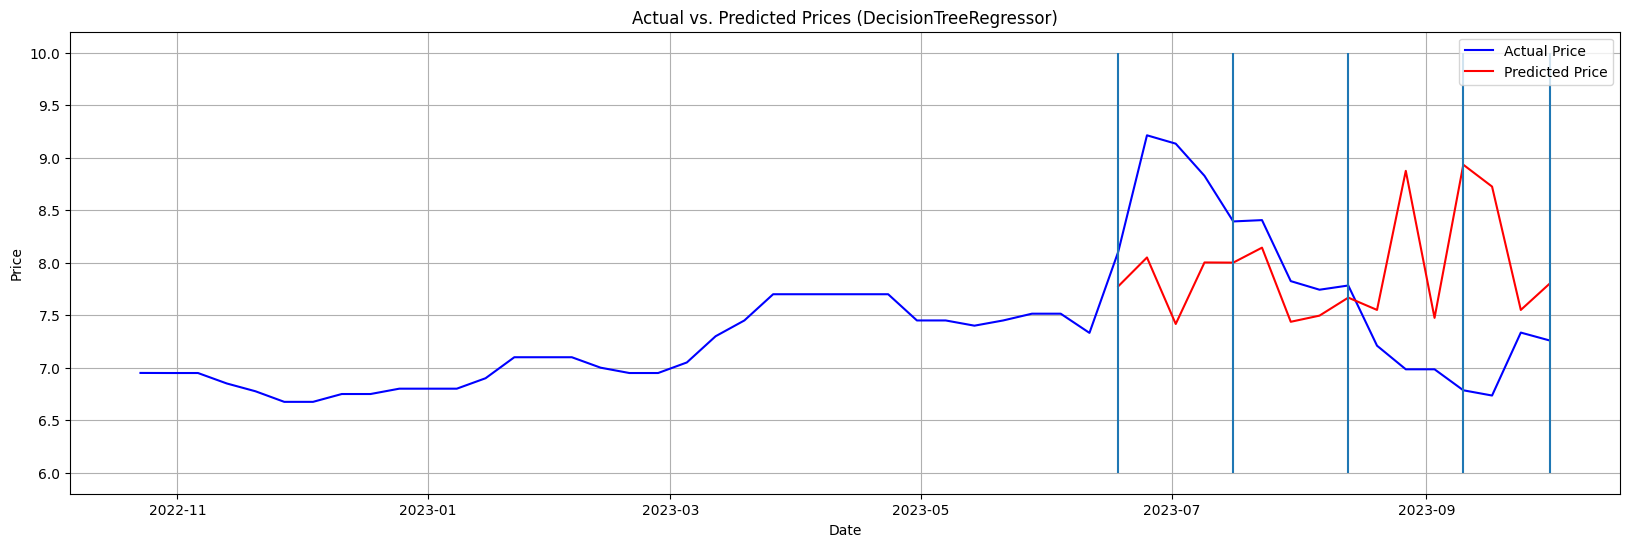

In [267]:
plot_actual_vs_predicted(actual_df_red, outcome_red_all, 'red', 6, 10, 'DecisionTreeRegressor' )

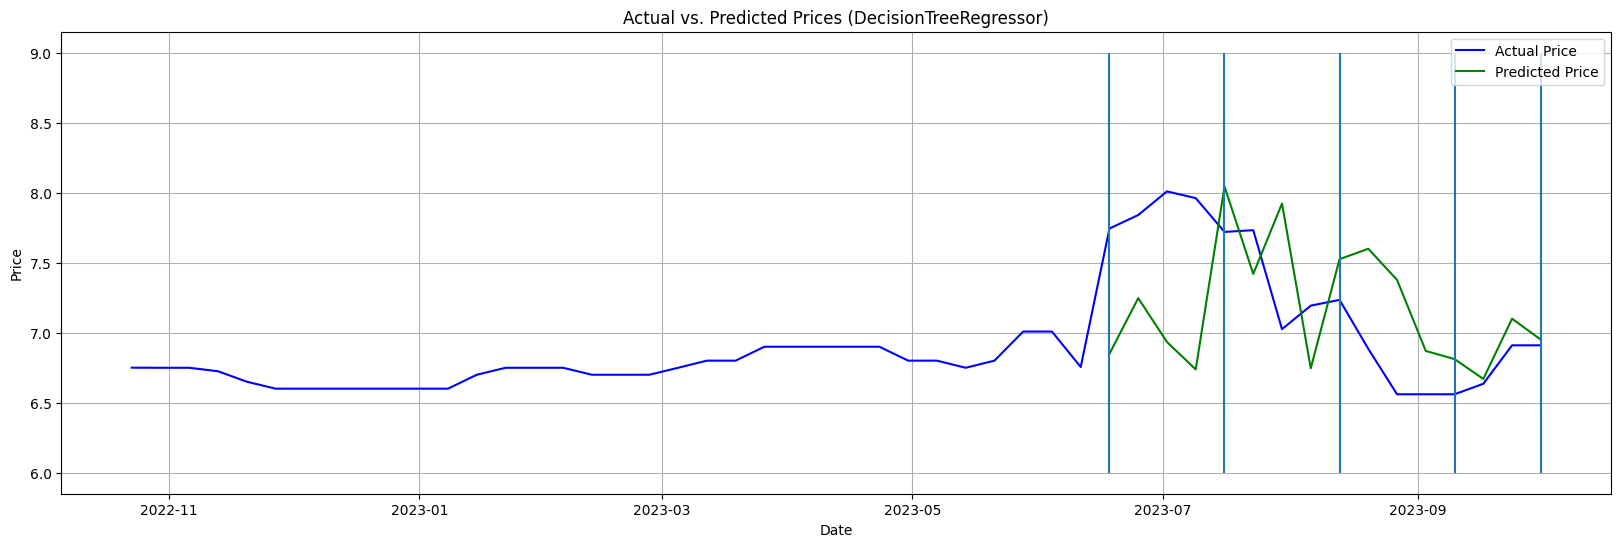

In [269]:
plot_actual_vs_predicted(actual_df_green, outcome_green_all, 'green',6 ,9, 'DecisionTreeRegressor' )

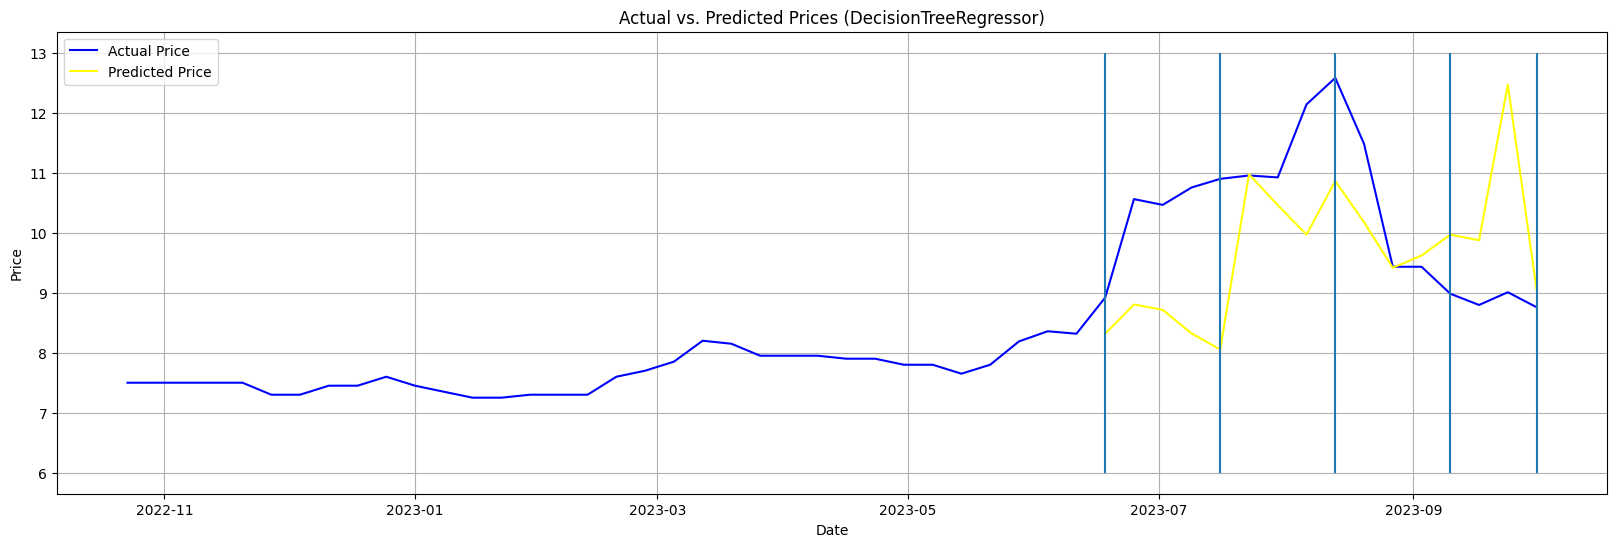

In [270]:
plot_actual_vs_predicted(actual_df_yellow, outcome_yellow_all, 'yellow',6 ,13, 'DecisionTreeRegressor' )

##2) RandomForestRegressor

In [284]:
RandomForestRegressor_model_red = process_model_data(model_data_red, 'RandomForestRegressor')
RandomForestRegressor_model_green = process_model_data(model_data_green, 'RandomForestRegressor')
RandomForestRegressor_model_yellow= process_model_data(model_data_yellow, 'RandomForestRegressor')

In [287]:
RandomForestRegressor_model_red['mae'].mean()

0.578133851673075

In [285]:
RandomForestRegressor_model_green['mae'].mean()

0.5361523026346167

In [286]:
RandomForestRegressor_model_yellow['mae'].mean()

1.3223211362115372

In [288]:
df_RandomForestRegressor_red = process_weekly_data(RandomForestRegressor_model_red, week_dt, 'RandomForestRegressor' )
df_RandomForestRegressor_green = process_weekly_data(RandomForestRegressor_model_green, week_dt, 'RandomForestRegressor' )
df_RandomForestRegressor_yellow = process_weekly_data(RandomForestRegressor_model_yellow, week_dt, 'RandomForestRegressor' )

In [289]:
RandomForestRegressor_outcome_red_all= process_outcome_data(df_RandomForestRegressor_red, week_dt)
RandomForestRegressor_outcome_green_all= process_outcome_data(df_RandomForestRegressor_green, week_dt)
RandomForestRegressor_outcome_yellow_all= process_outcome_data(df_RandomForestRegressor_yellow, week_dt)

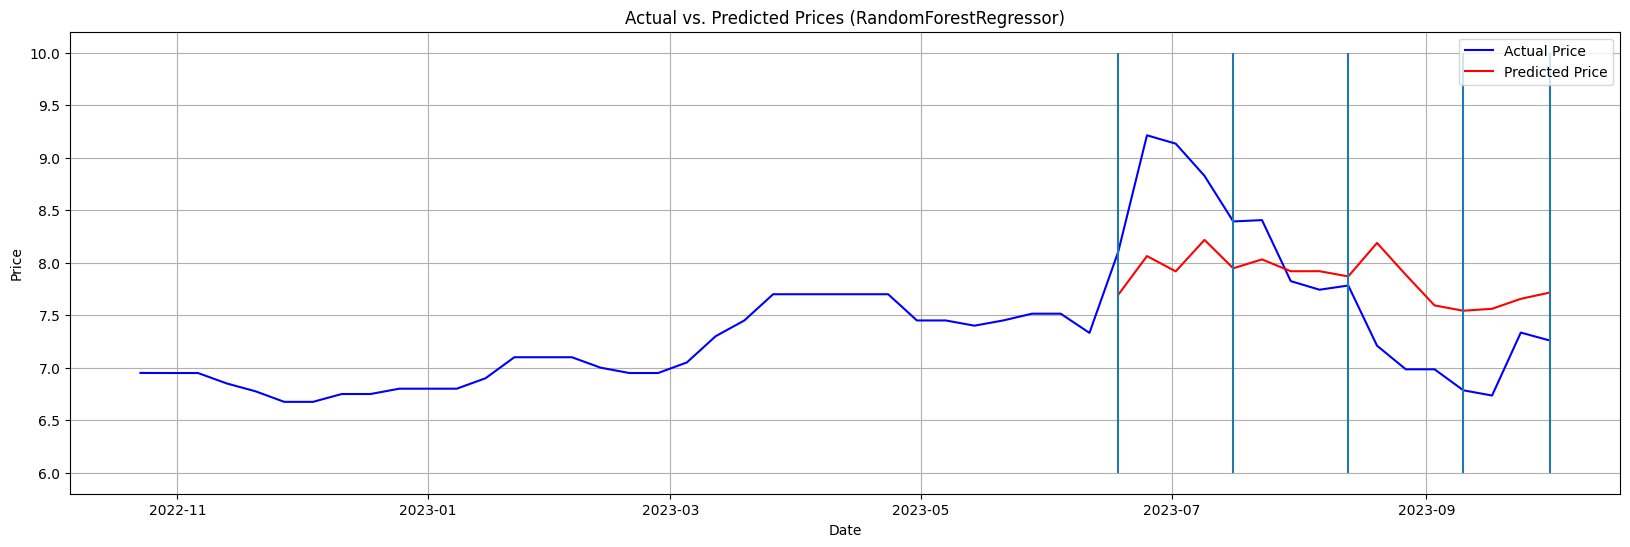

In [290]:
plot_actual_vs_predicted(actual_df_red, RandomForestRegressor_outcome_red_all, 'red', 6, 10, 'RandomForestRegressor' )

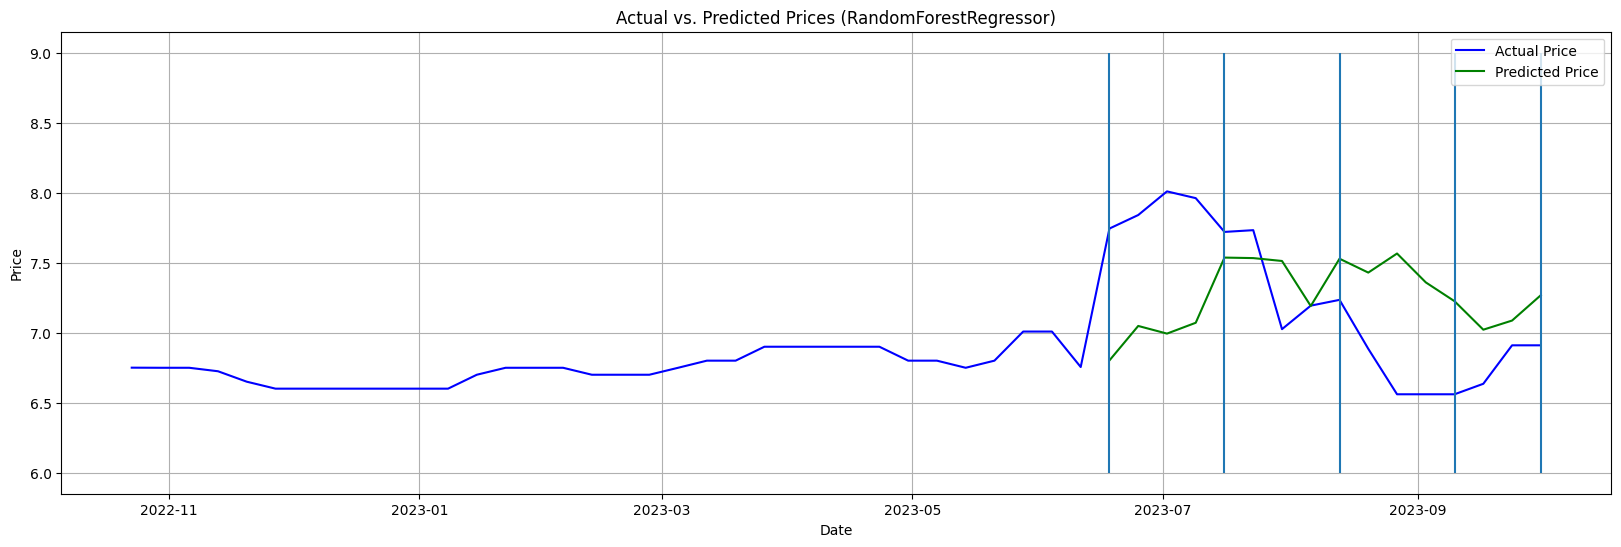

In [291]:
plot_actual_vs_predicted(actual_df_green, RandomForestRegressor_outcome_green_all, 'green',6 ,9, 'RandomForestRegressor' )

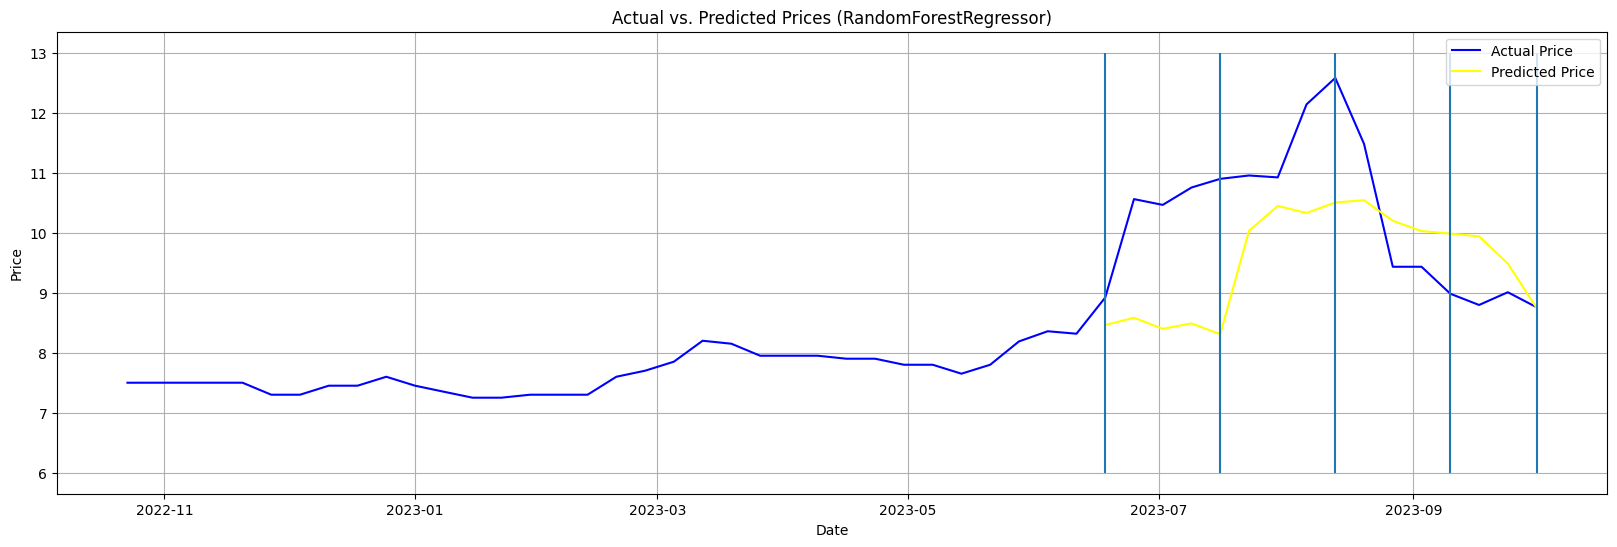

In [292]:
plot_actual_vs_predicted(actual_df_yellow, RandomForestRegressor_outcome_yellow_all, 'yellow',6 ,13, 'RandomForestRegressor' )

##3) SVR

In [293]:
SVR_model_red = process_model_data(model_data_red, 'SVR')
SVR_model_green = process_model_data(model_data_green, 'SVR')
SVR_model_yellow= process_model_data(model_data_yellow, 'SVR')

In [294]:
SVR_model_red['mae'].mean()

0.6100996100456575

In [295]:
SVR_model_green['mae'].mean()

0.46150736354759064

In [296]:
SVR_model_yellow['mae'].mean()

1.4909934163531882

In [297]:
df_SVR_red = process_weekly_data(SVR_model_red, week_dt, 'SVR' )
df_SVR_green = process_weekly_data(SVR_model_green, week_dt, 'SVR' )
df_SVR_yellow = process_weekly_data(SVR_model_yellow, week_dt, 'SVR' )

In [298]:
SVR_outcome_red_all= process_outcome_data(df_SVR_red, week_dt)
SVR_outcome_green_all= process_outcome_data(df_SVR_green, week_dt)
SVR_outcome_yellow_all= process_outcome_data(df_SVR_yellow, week_dt)

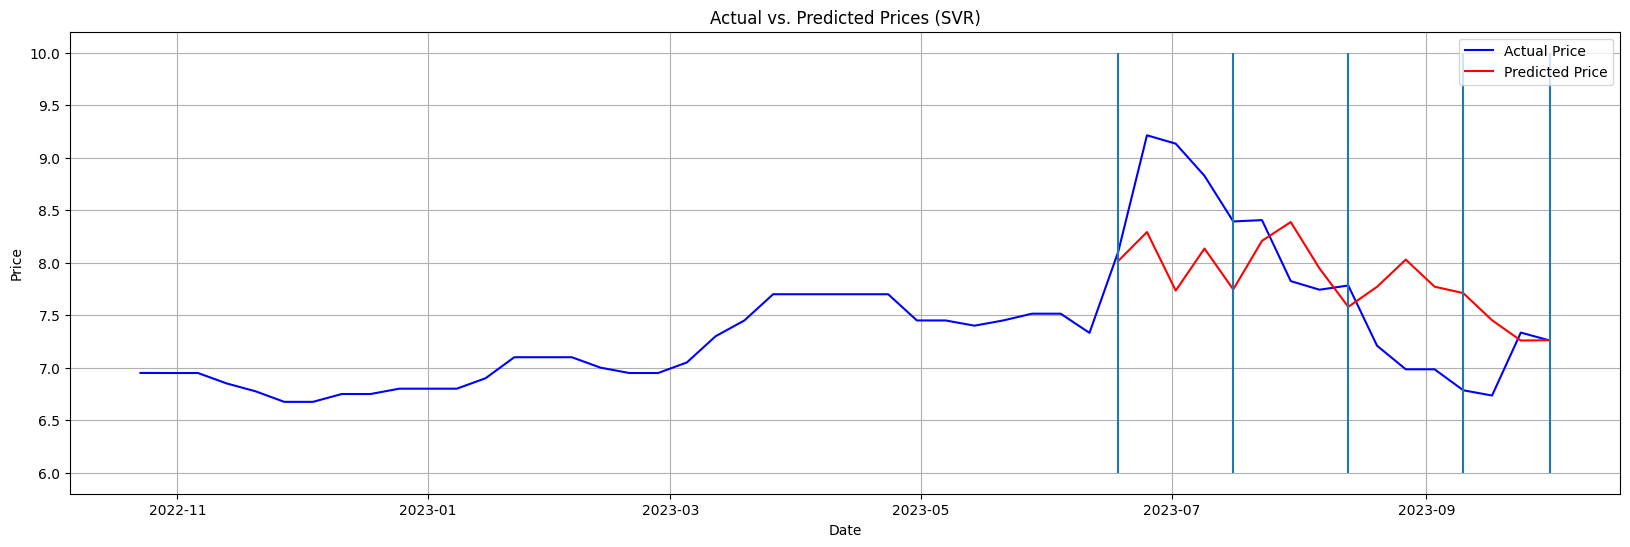

In [299]:
plot_actual_vs_predicted(actual_df_red, SVR_outcome_red_all, 'red', 6, 10, 'SVR' )

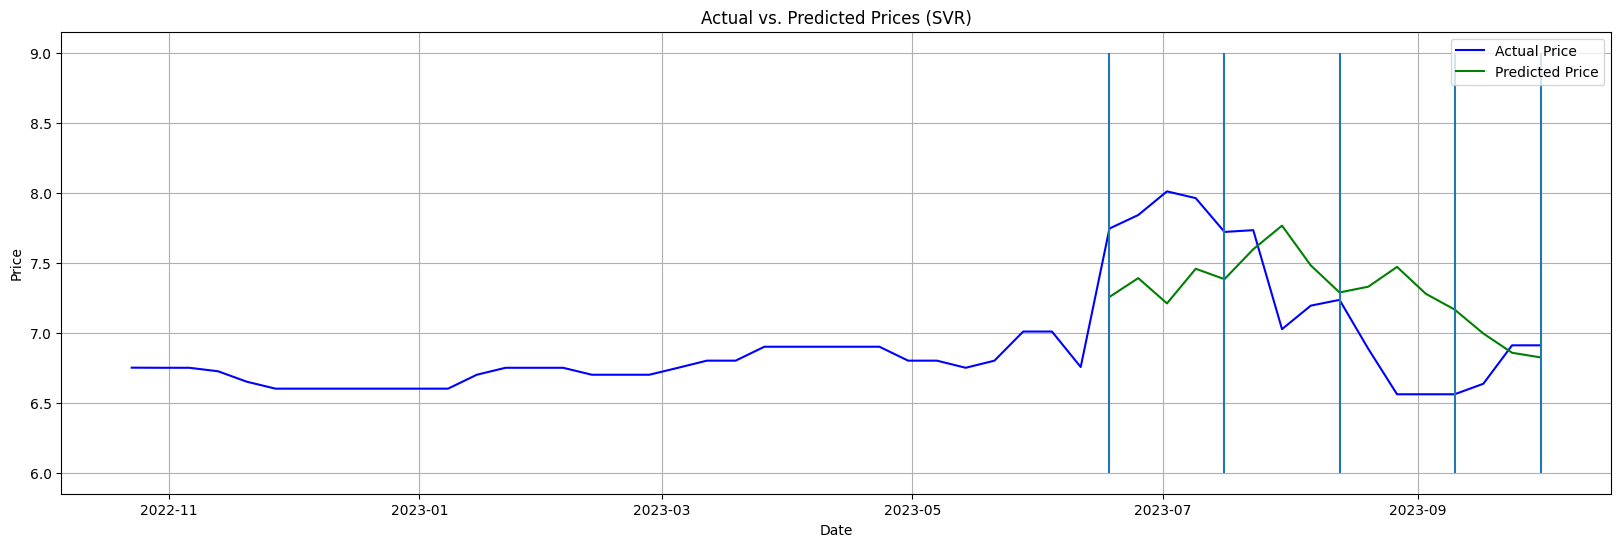

In [300]:
plot_actual_vs_predicted(actual_df_green, SVR_outcome_green_all, 'green',6 ,9, 'SVR' )

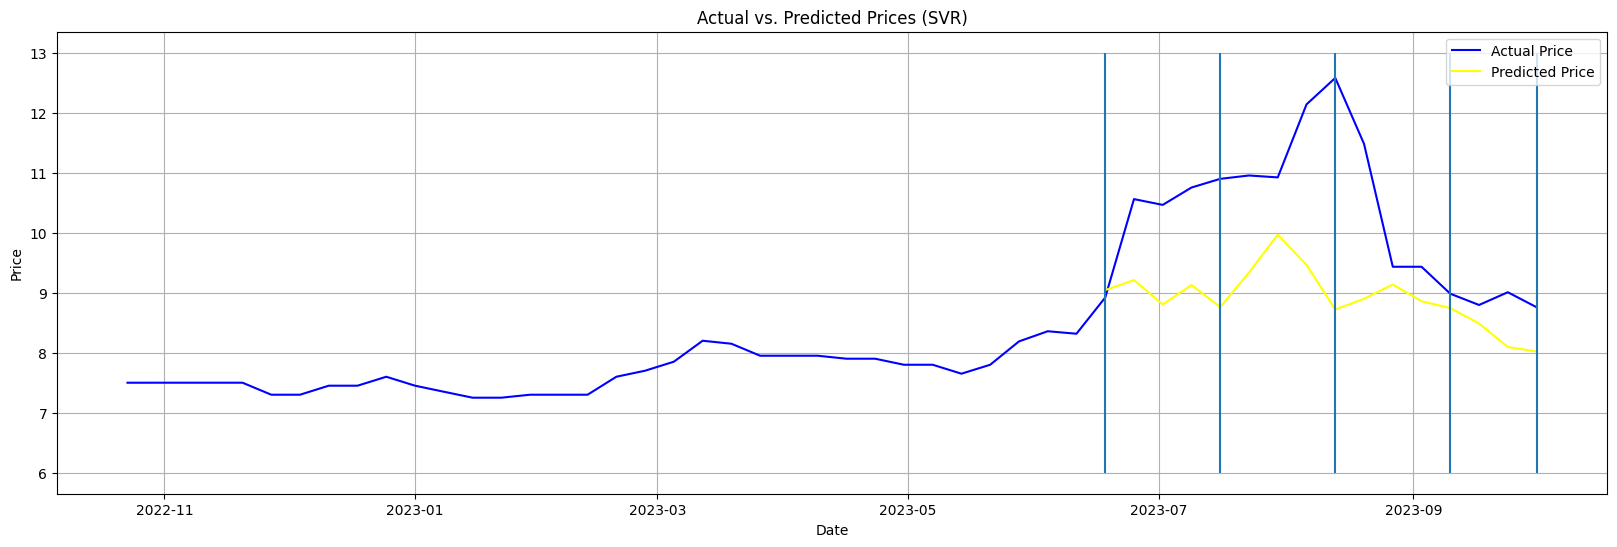

In [301]:
plot_actual_vs_predicted(actual_df_yellow, SVR_outcome_yellow_all, 'yellow',6 ,13, 'SVR' )

##4) LinearRegression

In [302]:
LinearRegression_model_red = process_model_data(model_data_red, 'LinearRegression')
LinearRegression_model_green = process_model_data(model_data_green, 'LinearRegression')
LinearRegression_model_yellow= process_model_data(model_data_yellow, 'LinearRegression')

In [309]:
LinearRegression_model_red['mae'].mean()

0.5897789354925358

In [304]:
LinearRegression_model_green['mae'].mean()

0.4445548170405875

In [305]:
LinearRegression_model_yellow['mae'].mean()

1.3754202557216786

In [306]:
df_LinearRegression_red = process_weekly_data(LinearRegression_model_red, week_dt, 'LinearRegression' )
df_LinearRegression_green = process_weekly_data(LinearRegression_model_green, week_dt, 'LinearRegression' )
df_LinearRegression_yellow = process_weekly_data(LinearRegression_model_yellow, week_dt, 'LinearRegression' )

In [311]:
LinearRegression_outcome_red_all= process_outcome_data(df_LinearRegression_red, week_dt)
LinearRegression_outcome_green_all= process_outcome_data(df_LinearRegression_green, week_dt)
LinearRegression_outcome_yellow_all= process_outcome_data(df_LinearRegression_yellow, week_dt)

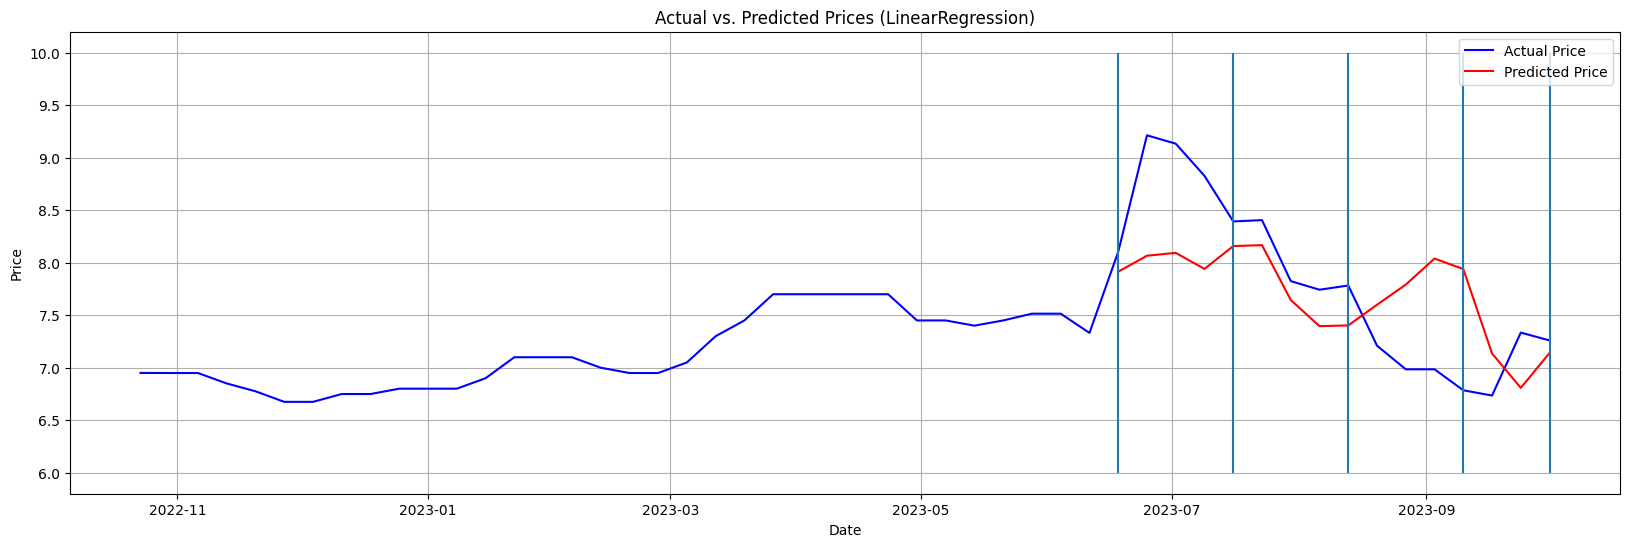

In [308]:
plot_actual_vs_predicted(actual_df_red, LinearRegression_outcome_red_all, 'red', 6, 10, 'LinearRegression' )

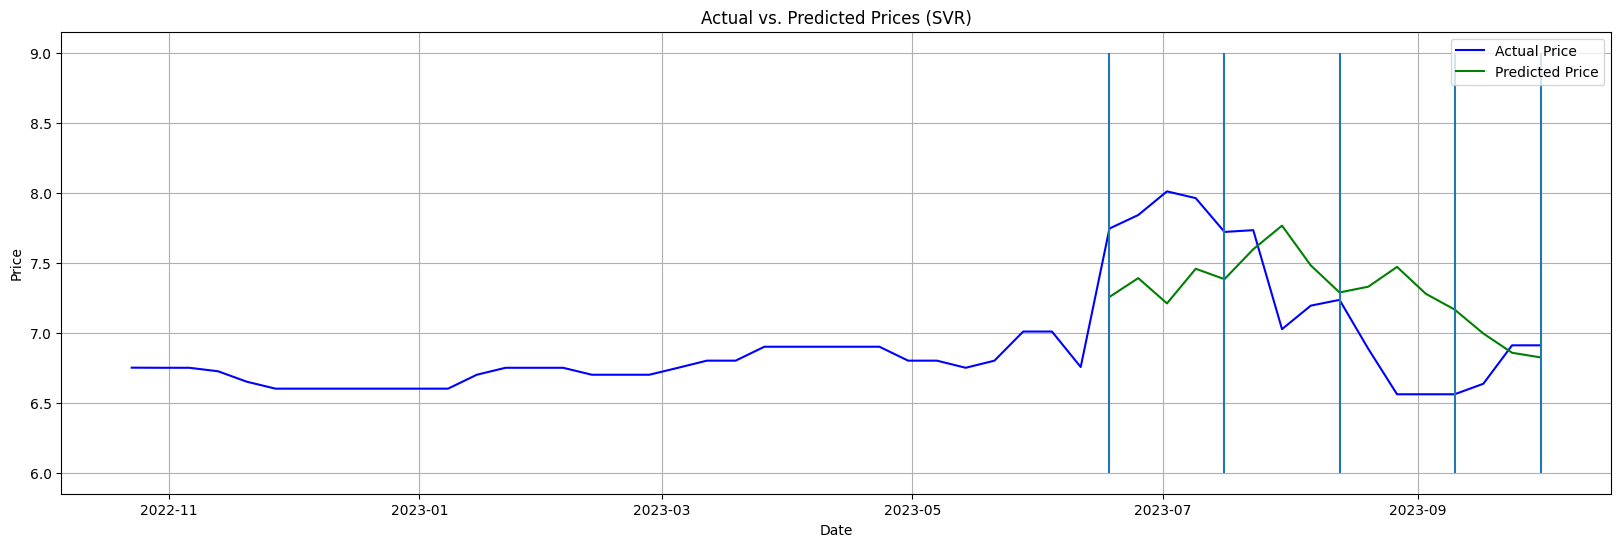

In [ ]:
plot_actual_vs_predicted(actual_df_green, LinearRegression_outcome_green_all, 'green',6 ,9, 'LinearRegression' )

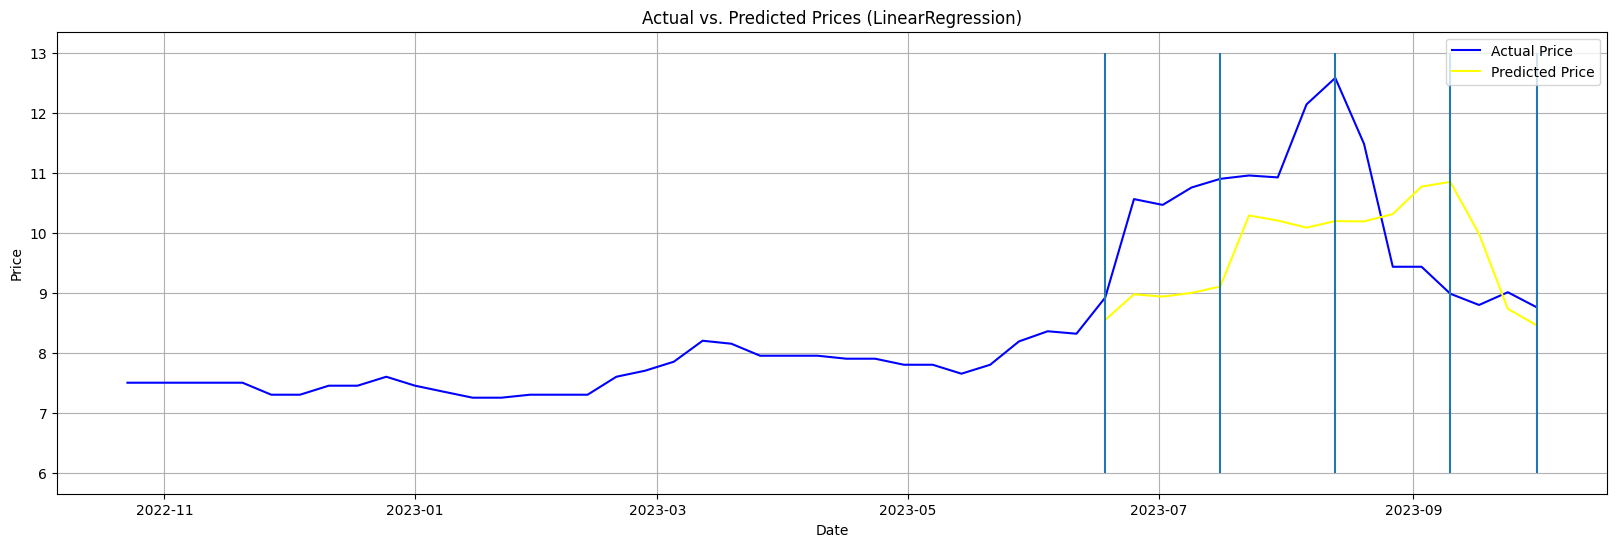

In [312]:
plot_actual_vs_predicted(actual_df_yellow, LinearRegression_outcome_yellow_all, 'yellow',6 ,13, 'LinearRegression' )

##5) XGBRegressor

In [313]:
XGBRegressor_model_red = process_model_data(model_data_red, 'XGBRegressor')
XGBRegressor_model_green = process_model_data(model_data_green, 'XGBRegressor')
XGBRegressor_model_yellow= process_model_data(model_data_yellow, 'XGBRegressor')

In [314]:
XGBRegressor_model_red['mae'].mean()

0.48611141740394015

In [315]:
XGBRegressor_model_green['mae'].mean()

0.47459321533367455

In [316]:
XGBRegressor_model_yellow['mae'].mean()

1.3498021869458714

In [317]:
df_XGBRegressor_red = process_weekly_data(XGBRegressor_model_red, week_dt, 'XGBRegressor' )
df_XGBRegressor_green = process_weekly_data(XGBRegressor_model_green, week_dt, 'XGBRegressor' )
df_XGBRegressor_yellow = process_weekly_data(XGBRegressor_model_yellow, week_dt, 'XGBRegressor' )

In [318]:
XGBRegressor_outcome_red_all= process_outcome_data(df_XGBRegressor_red, week_dt)
XGBRegressor_outcome_green_all= process_outcome_data(df_XGBRegressor_green, week_dt)
XGBRegressor_outcome_yellow_all= process_outcome_data(df_XGBRegressor_yellow, week_dt)

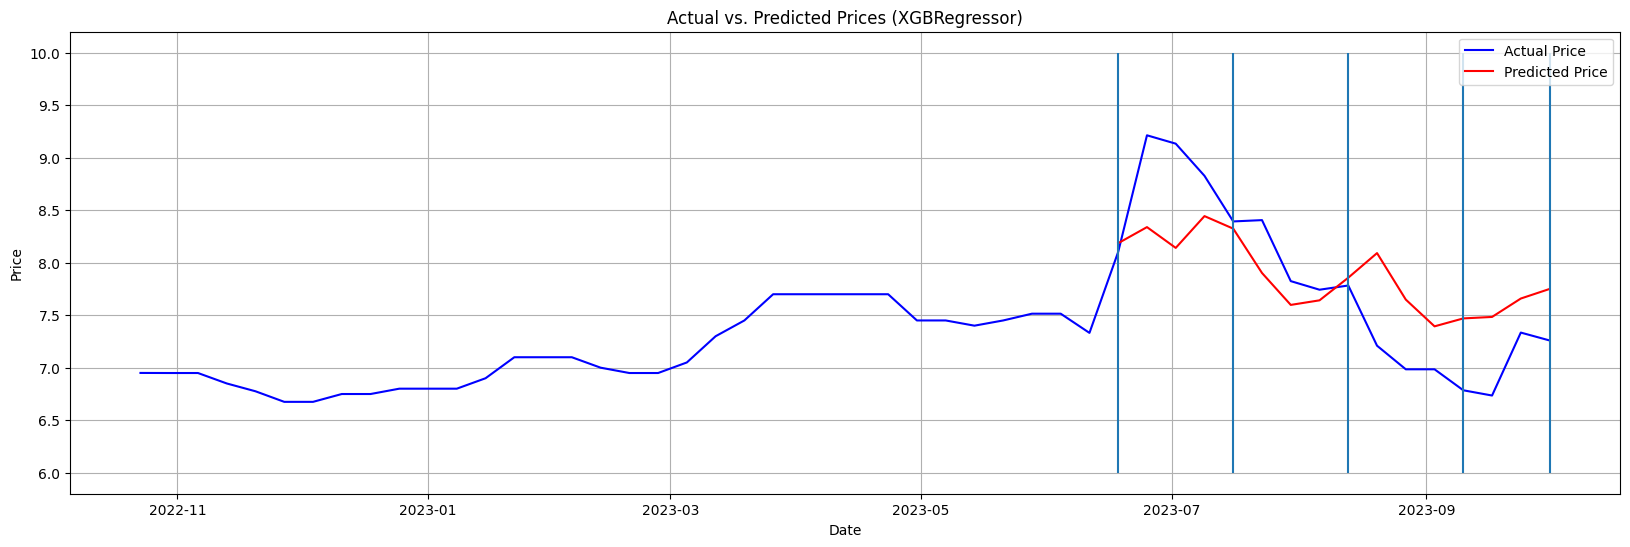

In [319]:
plot_actual_vs_predicted(actual_df_red, XGBRegressor_outcome_red_all, 'red', 6, 10, 'XGBRegressor' )

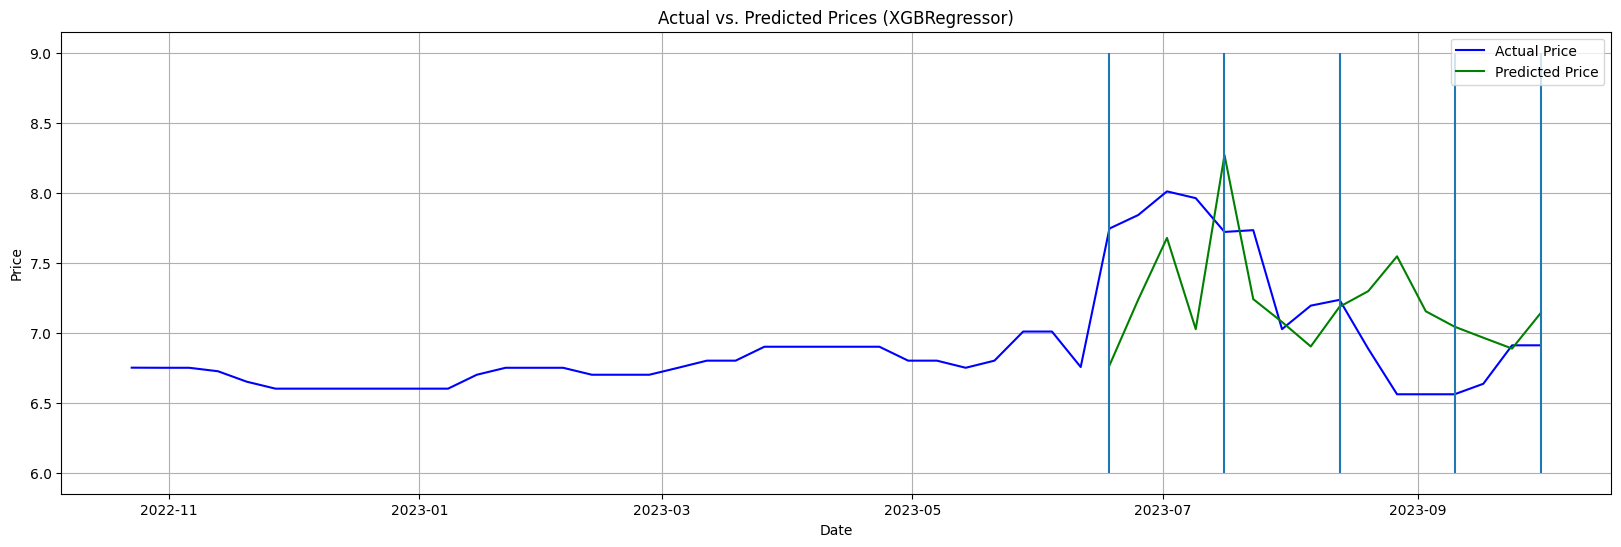

In [320]:
plot_actual_vs_predicted(actual_df_green, XGBRegressor_outcome_green_all, 'green',6 ,9, 'XGBRegressor' )

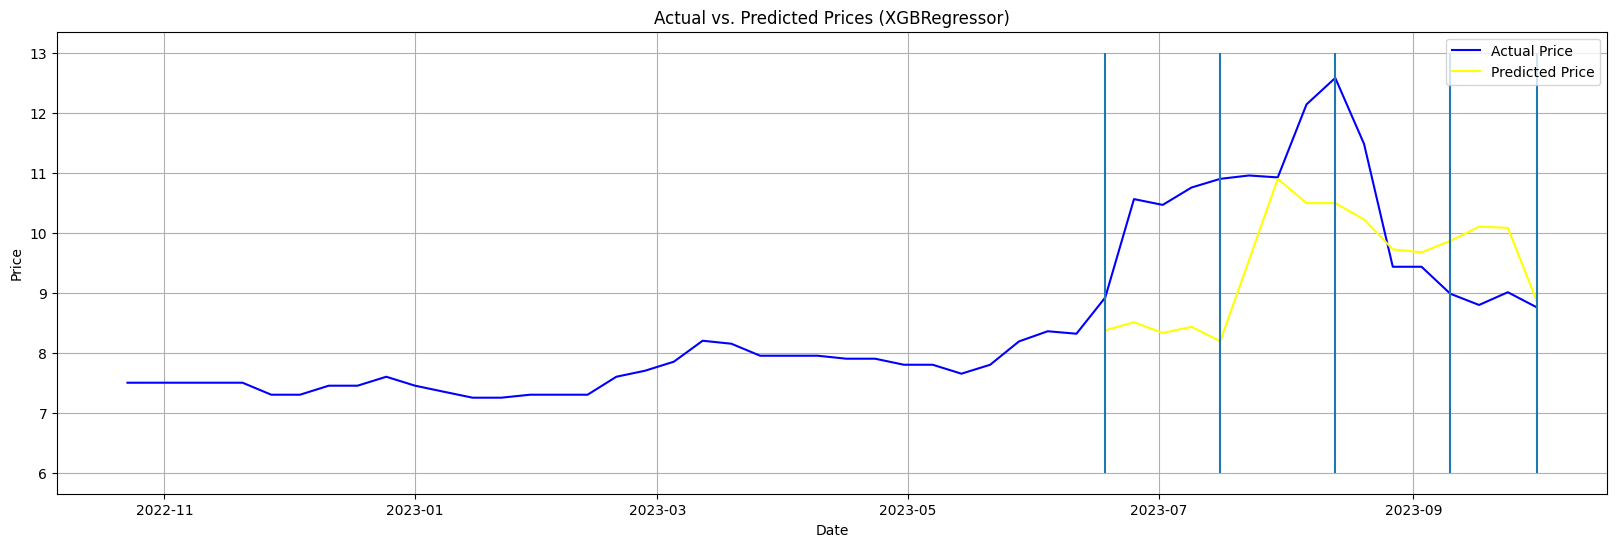

In [321]:
plot_actual_vs_predicted(actual_df_yellow, XGBRegressor_outcome_yellow_all, 'yellow',6 ,13, 'XGBRegressor' )

##6) XGBRFRegressor

In [322]:
XGBRFRegressor_model_red = process_model_data(model_data_red, 'XGBRFRegressor')
XGBRFRegressor_model_green = process_model_data(model_data_green, 'XGBRFRegressor')
XGBRFRegressor_model_yellow= process_model_data(model_data_yellow, 'XGBRFRegressor')

In [323]:
XGBRFRegressor_model_red['mae'].mean()

0.6368484838333129

In [324]:
XGBRFRegressor_model_green['mae'].mean()

0.5238281069432187

In [325]:
XGBRFRegressor_model_yellow['mae'].mean()

1.3156700889448902

In [326]:
df_XGBRFRegressor_red = process_weekly_data(XGBRFRegressor_model_red, week_dt, 'XGBRFRegressor' )
df_XGBRFRegressor_green = process_weekly_data(XGBRFRegressor_model_green, week_dt, 'XGBRFRegressor' )
df_XGBRFRegressor_yellow = process_weekly_data(XGBRFRegressor_model_yellow, week_dt, 'XGBRFRegressor' )

In [327]:
XGBRFRegressor_outcome_red_all= process_outcome_data(df_XGBRFRegressor_red, week_dt)
XGBRFRegressor_outcome_green_all= process_outcome_data(df_XGBRFRegressor_green, week_dt)
XGBRFRegressor_outcome_yellow_all= process_outcome_data(df_XGBRFRegressor_yellow, week_dt)

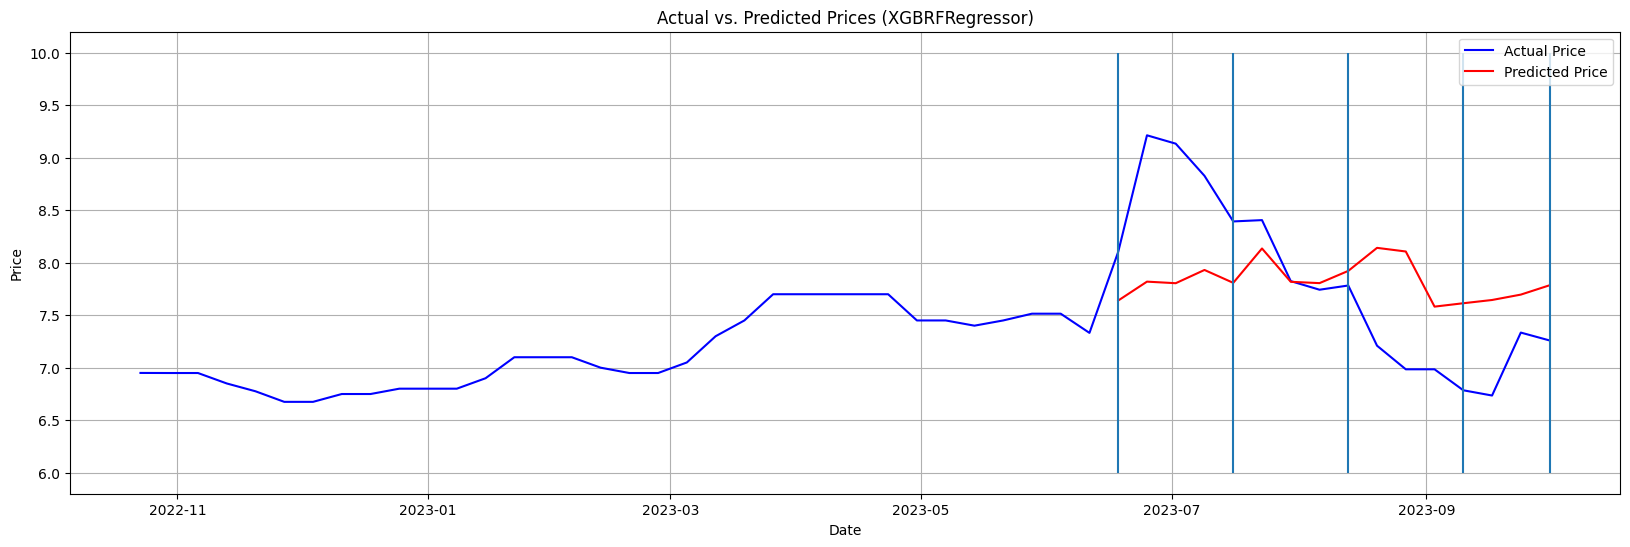

In [328]:
plot_actual_vs_predicted(actual_df_red, XGBRFRegressor_outcome_red_all, 'red', 6, 10, 'XGBRFRegressor' )

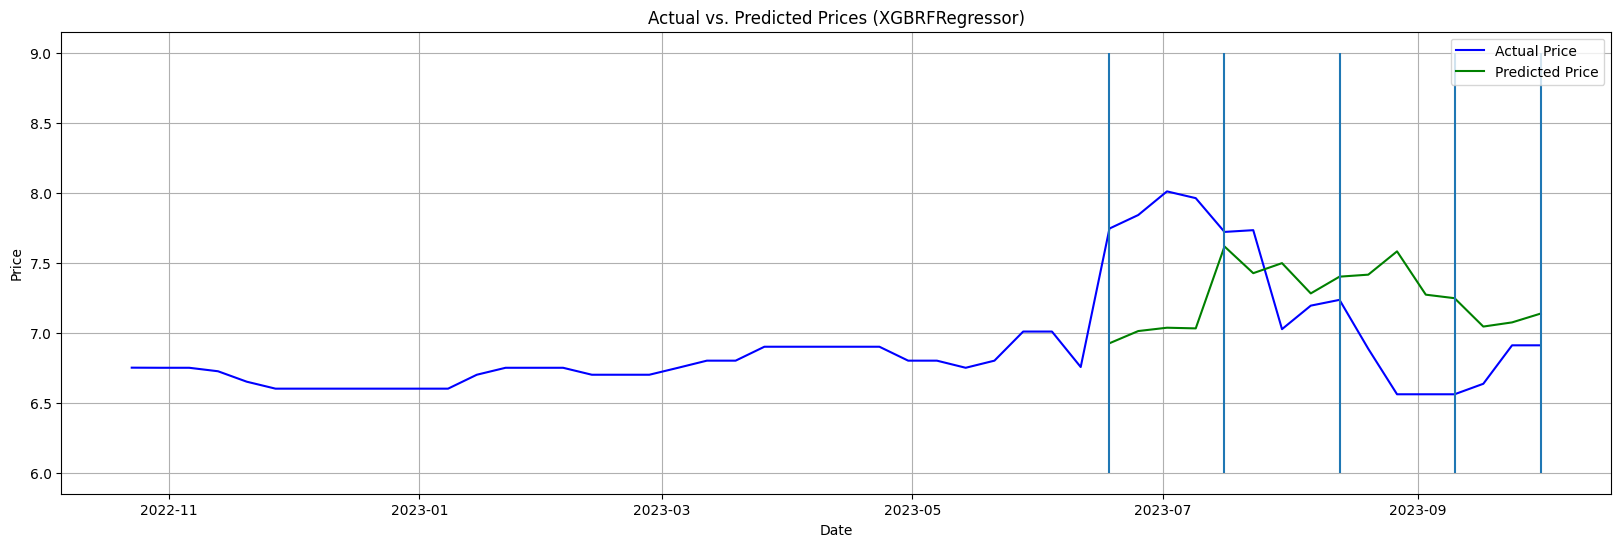

In [329]:
plot_actual_vs_predicted(actual_df_green, XGBRFRegressor_outcome_green_all, 'green',6 ,9, 'XGBRFRegressor' )

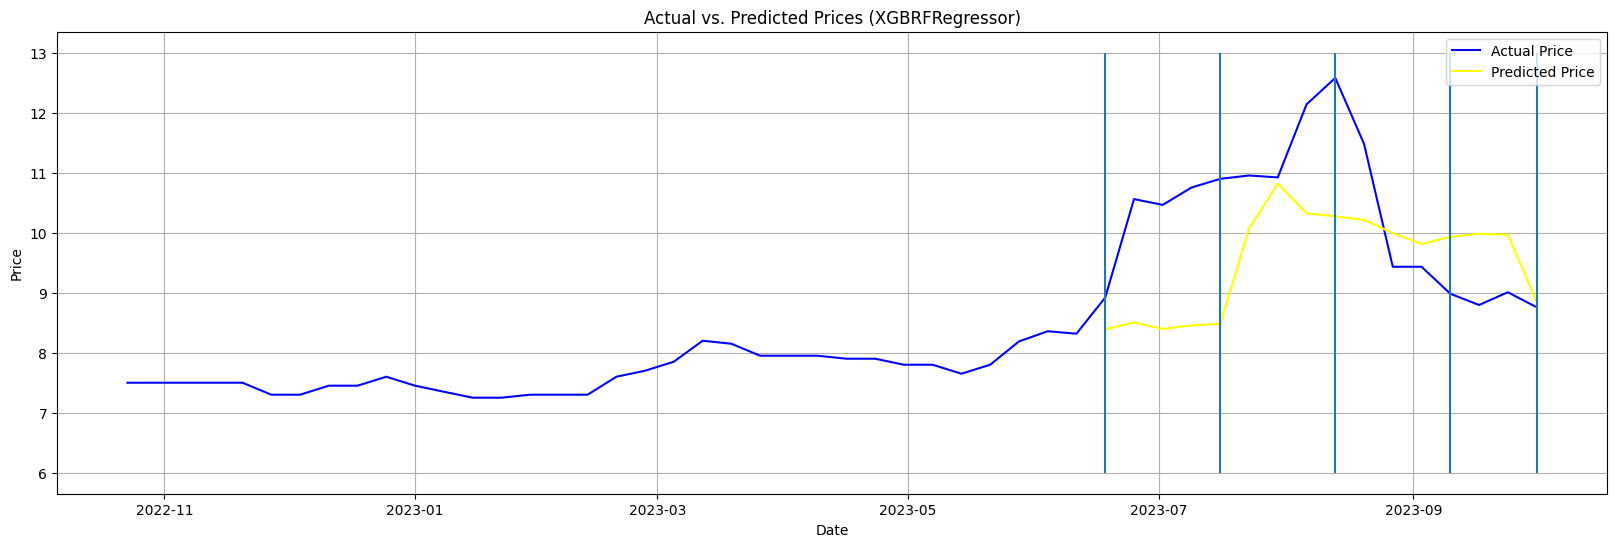

In [330]:
plot_actual_vs_predicted(actual_df_yellow, XGBRFRegressor_outcome_yellow_all, 'yellow',6 ,13, 'XGBRFRegressor' )

##7) AdaBoostRegressor

In [331]:
AdaBoostRegressor_model_red = process_model_data(model_data_red, 'AdaBoostRegressor')
AdaBoostRegressor_model_green = process_model_data(model_data_green, 'AdaBoostRegressor')
AdaBoostRegressor_model_yellow= process_model_data(model_data_yellow, 'AdaBoostRegressor')

In [332]:
AdaBoostRegressor_model_red['mae'].mean()

0.7449652904575306

In [333]:
AdaBoostRegressor_model_green['mae'].mean()

0.6701279130070847

In [334]:
AdaBoostRegressor_model_yellow['mae'].mean()

1.3246443923443476

In [335]:
df_AdaBoostRegressor_red = process_weekly_data(AdaBoostRegressor_model_red, week_dt, 'AdaBoostRegressor' )
df_AdaBoostRegressor_green = process_weekly_data(AdaBoostRegressor_model_green, week_dt, 'AdaBoostRegressor' )
df_AdaBoostRegressor_yellow = process_weekly_data(AdaBoostRegressor_model_yellow, week_dt, 'AdaBoostRegressor' )

In [336]:
AdaBoostRegressor_outcome_red_all= process_outcome_data(df_AdaBoostRegressor_red, week_dt)
AdaBoostRegressor_outcome_green_all= process_outcome_data(df_AdaBoostRegressor_green, week_dt)
AdaBoostRegressor_outcome_yellow_all= process_outcome_data(df_AdaBoostRegressor_yellow, week_dt)

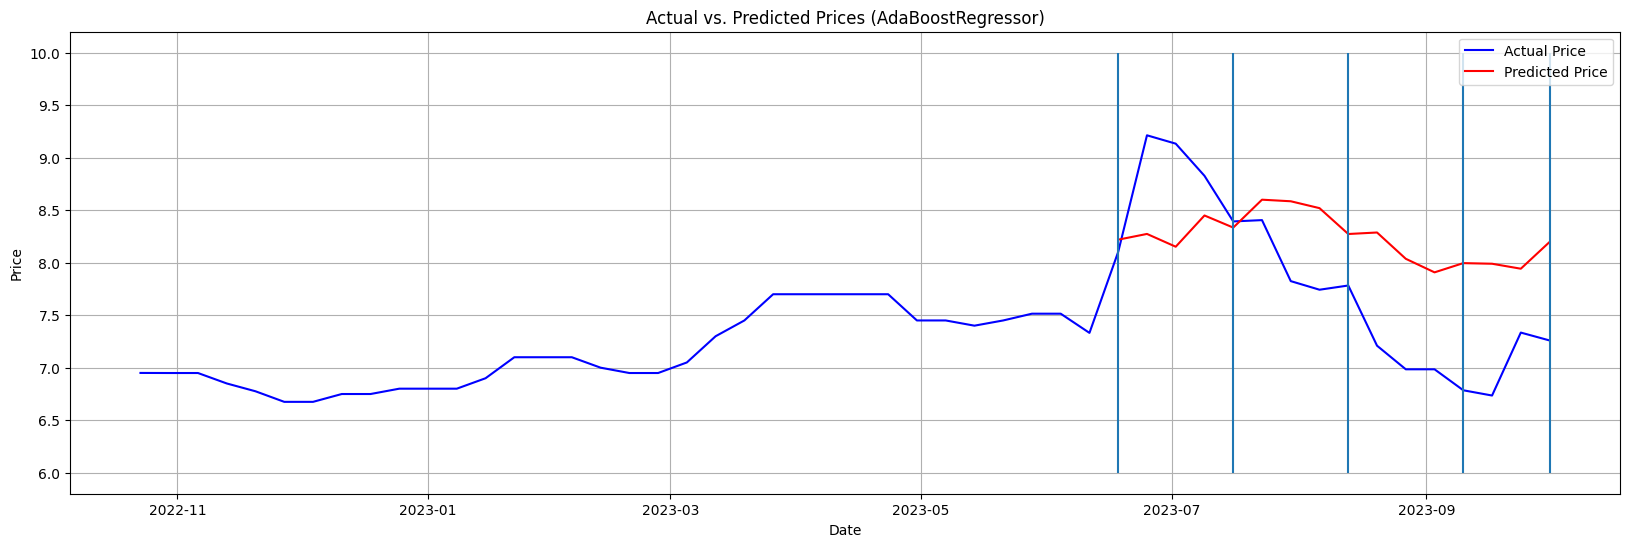

In [337]:
plot_actual_vs_predicted(actual_df_red, AdaBoostRegressor_outcome_red_all, 'red', 6, 10, 'AdaBoostRegressor' )

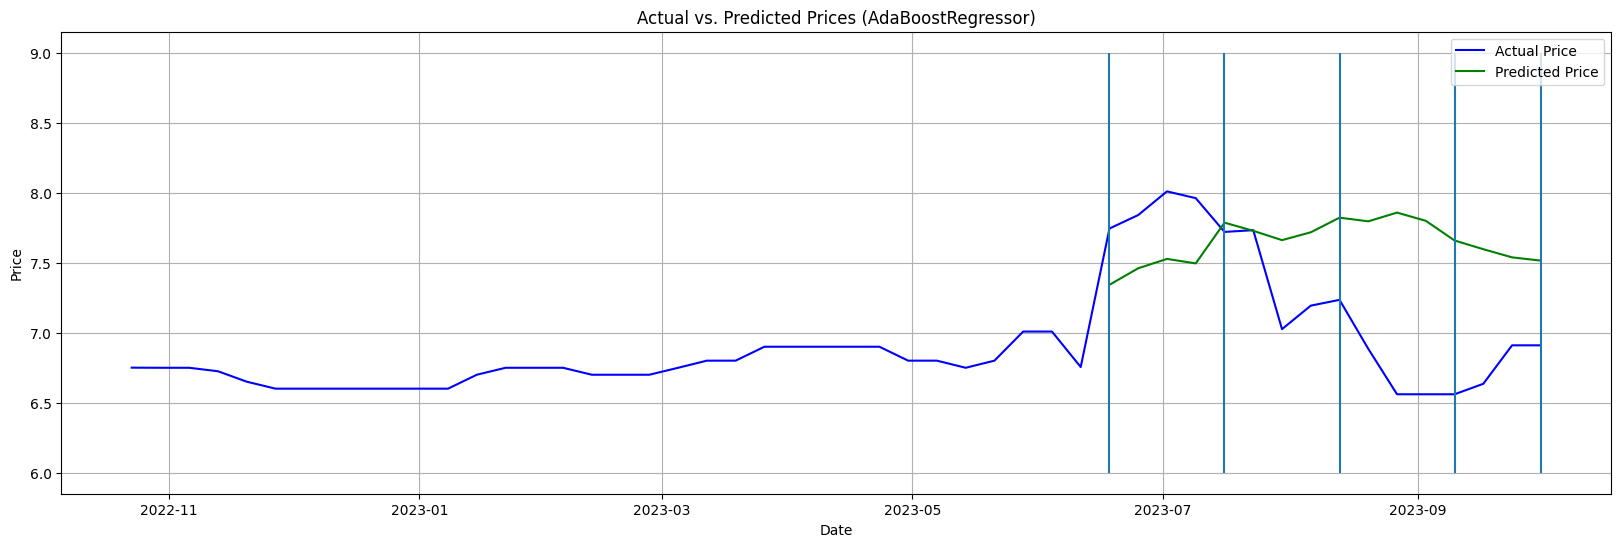

In [338]:
plot_actual_vs_predicted(actual_df_green, AdaBoostRegressor_outcome_green_all, 'green',6 ,9, 'AdaBoostRegressor' )

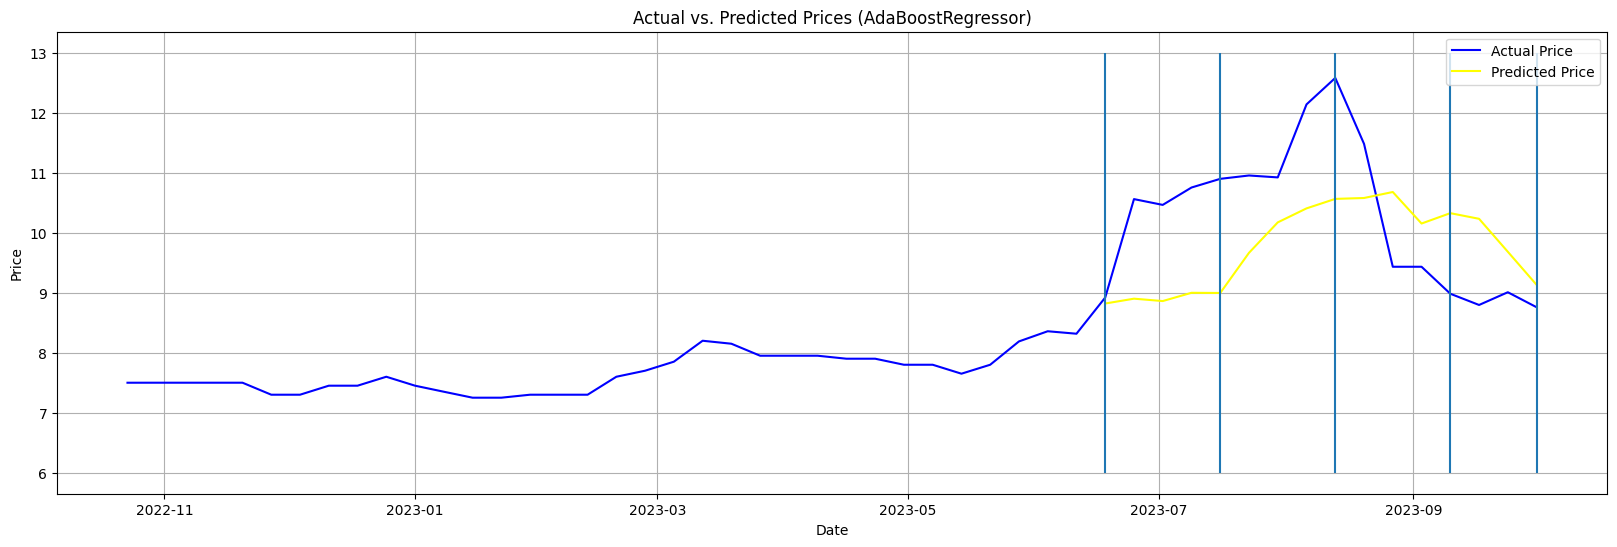

In [339]:
plot_actual_vs_predicted(actual_df_yellow, AdaBoostRegressor_outcome_yellow_all, 'yellow',6 ,13, 'AdaBoostRegressor' )

##8) LGBMRegressor

In [340]:
LGBMRegressor_model_red = process_model_data(model_data_red, 'LGBMRegressor')
LGBMRegressor_model_green = process_model_data(model_data_green, 'LGBMRegressor')
LGBMRegressor_model_yellow= process_model_data(model_data_yellow, 'LGBMRegressor')

In [341]:
LGBMRegressor_model_red['mae'].mean()

0.4534644350053145

In [342]:
LGBMRegressor_model_green['mae'].mean()

0.48943357677641497

In [343]:
LGBMRegressor_model_yellow['mae'].mean()

1.2576370700047463

In [344]:
df_LGBMRegressor_red = process_weekly_data(LGBMRegressor_model_red, week_dt, 'LGBMRegressor' )
df_LGBMRegressor_green = process_weekly_data(LGBMRegressor_model_green, week_dt, 'LGBMRegressor' )
df_LGBMRegressor_yellow = process_weekly_data(LGBMRegressor_model_yellow, week_dt, 'LGBMRegressor' )

In [345]:
LGBMRegressor_outcome_red_all= process_outcome_data(df_LGBMRegressor_red, week_dt)
LGBMRegressor_outcome_green_all= process_outcome_data(df_LGBMRegressor_green, week_dt)
LGBMRegressor_outcome_yellow_all= process_outcome_data(df_LGBMRegressor_yellow, week_dt)

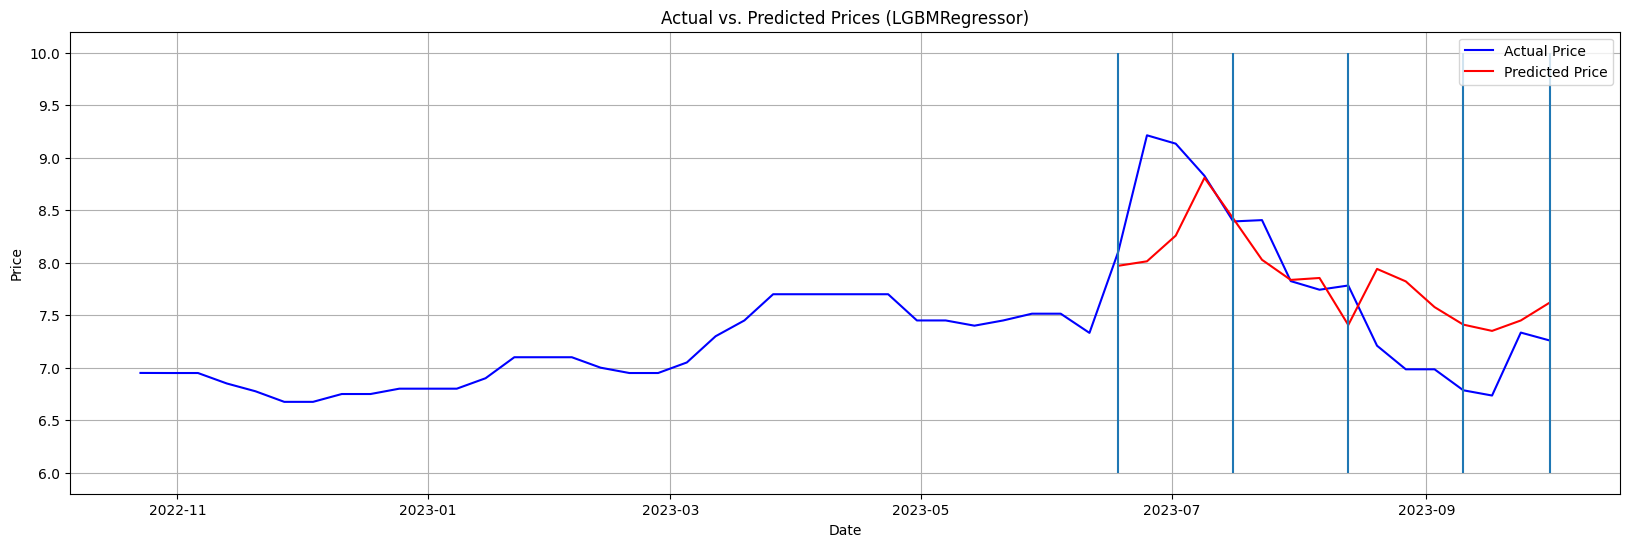

In [346]:
plot_actual_vs_predicted(actual_df_red, LGBMRegressor_outcome_red_all, 'red', 6, 10, 'LGBMRegressor' )

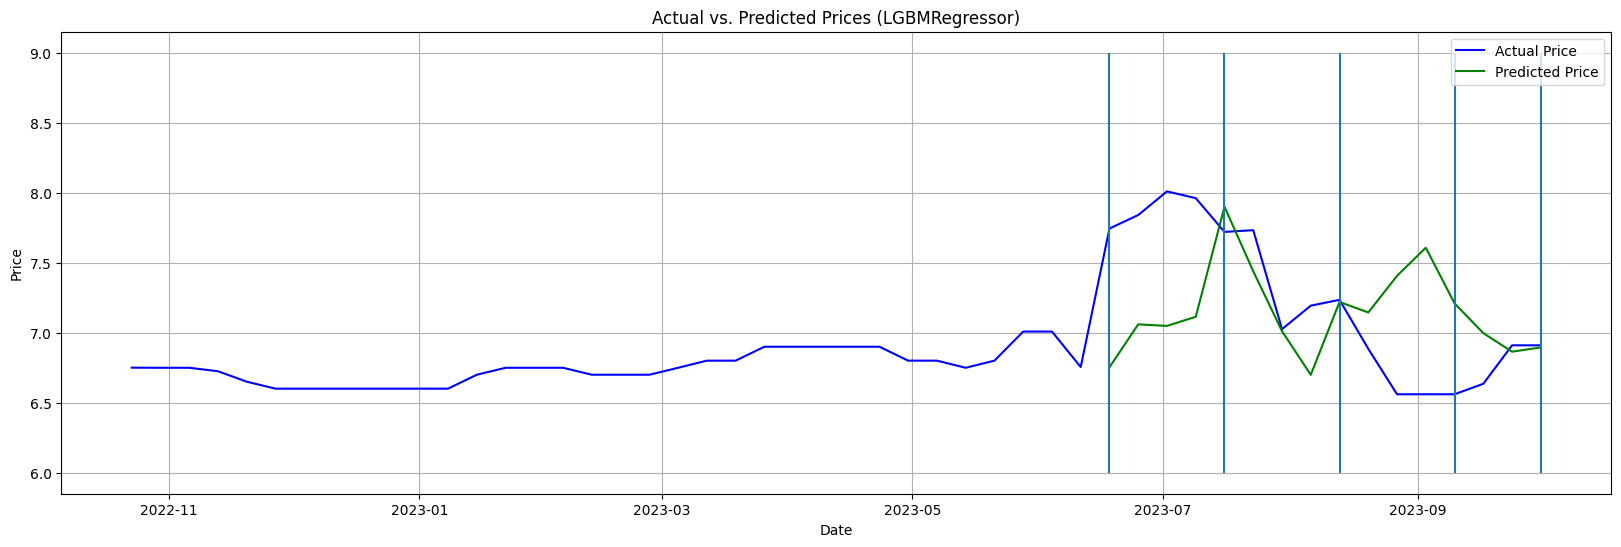

In [347]:
plot_actual_vs_predicted(actual_df_green, LGBMRegressor_outcome_green_all, 'green',6 ,9, 'LGBMRegressor' )

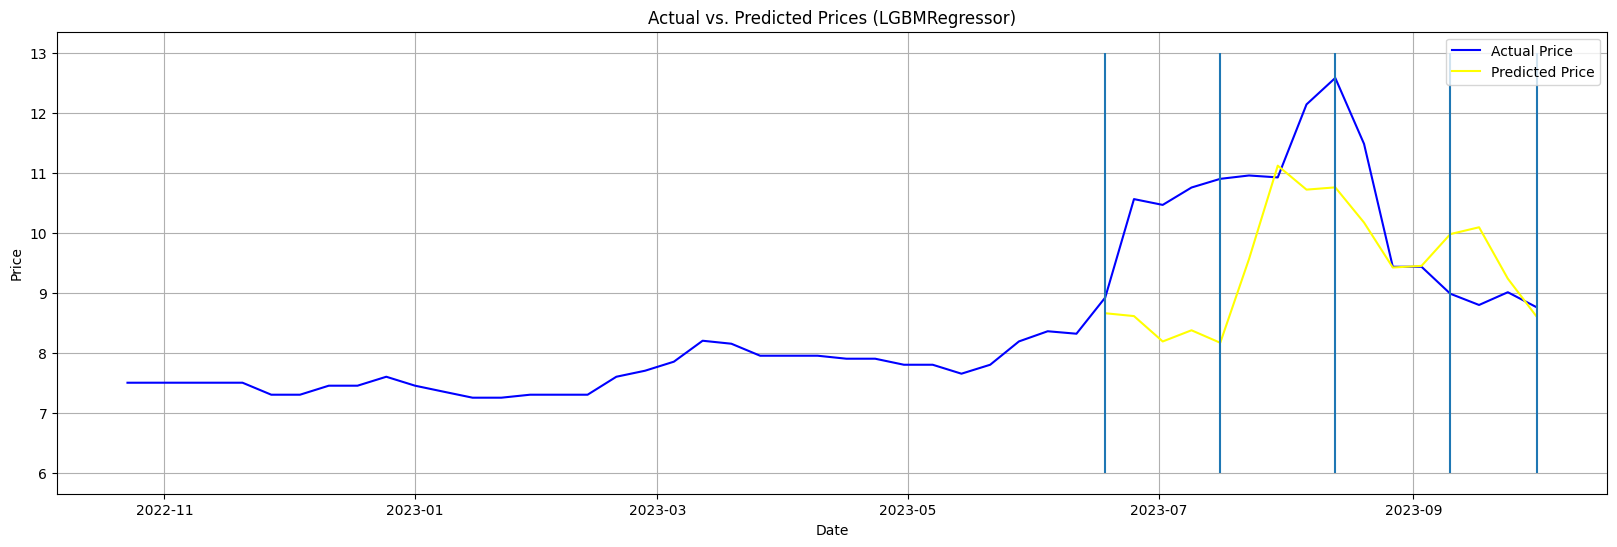

In [348]:
plot_actual_vs_predicted(actual_df_yellow, LGBMRegressor_outcome_yellow_all, 'yellow',6 ,13, 'LGBMRegressor' )

##9) CatBoostRegressor

In [349]:
CatBoostRegressor_model_red = process_model_data(model_data_red, 'CatBoostRegressor')
CatBoostRegressor_model_green = process_model_data(model_data_green, 'CatBoostRegressor')
CatBoostRegressor_model_yellow= process_model_data(model_data_yellow, 'CatBoostRegressor')

In [350]:
CatBoostRegressor_model_red['mae'].mean()

0.5019152793326817

In [351]:
CatBoostRegressor_model_green['mae'].mean()

0.4488461064457353

In [352]:
CatBoostRegressor_model_yellow['mae'].mean()

1.3273296421305985

In [353]:
df_CatBoostRegressor_red = process_weekly_data(CatBoostRegressor_model_red, week_dt, 'CatBoostRegressor' )
df_CatBoostRegressor_green = process_weekly_data(CatBoostRegressor_model_green, week_dt, 'CatBoostRegressor' )
df_CatBoostRegressor_yellow = process_weekly_data(CatBoostRegressor_model_yellow, week_dt, 'CatBoostRegressor' )

In [354]:
CatBoostRegressor_outcome_red_all= process_outcome_data(df_CatBoostRegressor_red, week_dt)
CatBoostRegressor_outcome_green_all= process_outcome_data(df_CatBoostRegressor_green, week_dt)
CatBoostRegressor_outcome_yellow_all= process_outcome_data(df_CatBoostRegressor_yellow, week_dt)

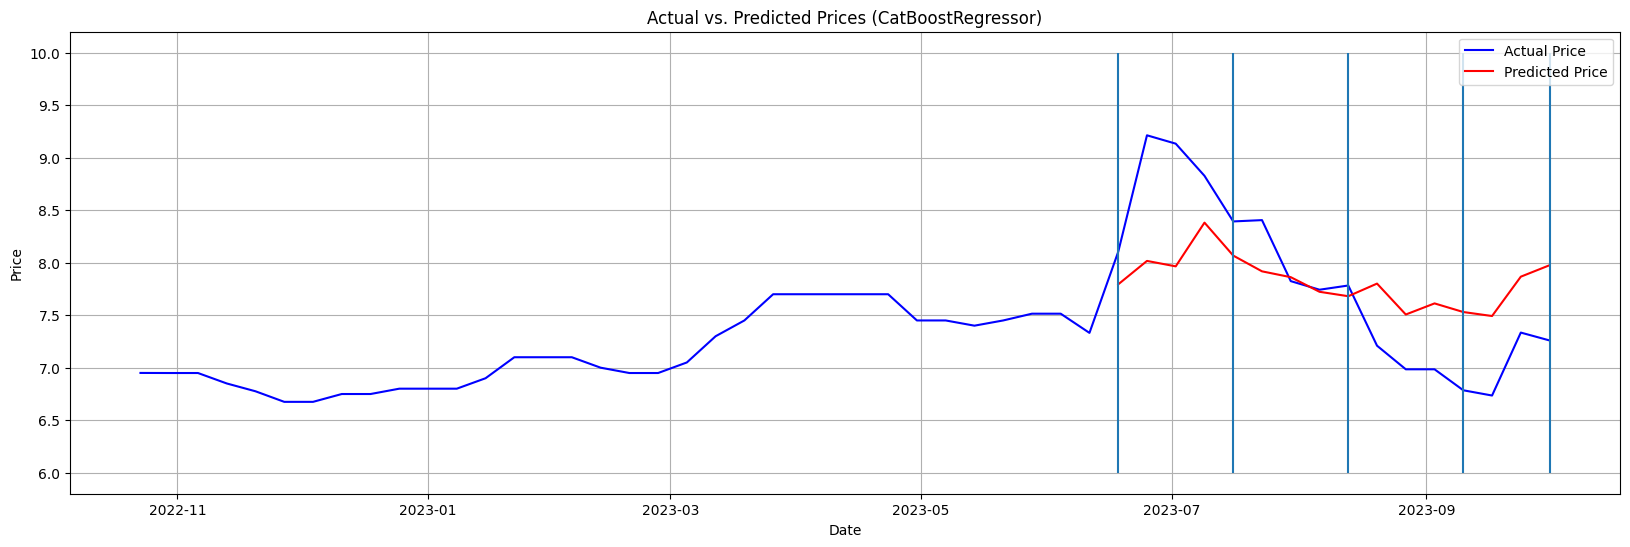

In [355]:
plot_actual_vs_predicted(actual_df_red, CatBoostRegressor_outcome_red_all, 'red', 6, 10, 'CatBoostRegressor' )

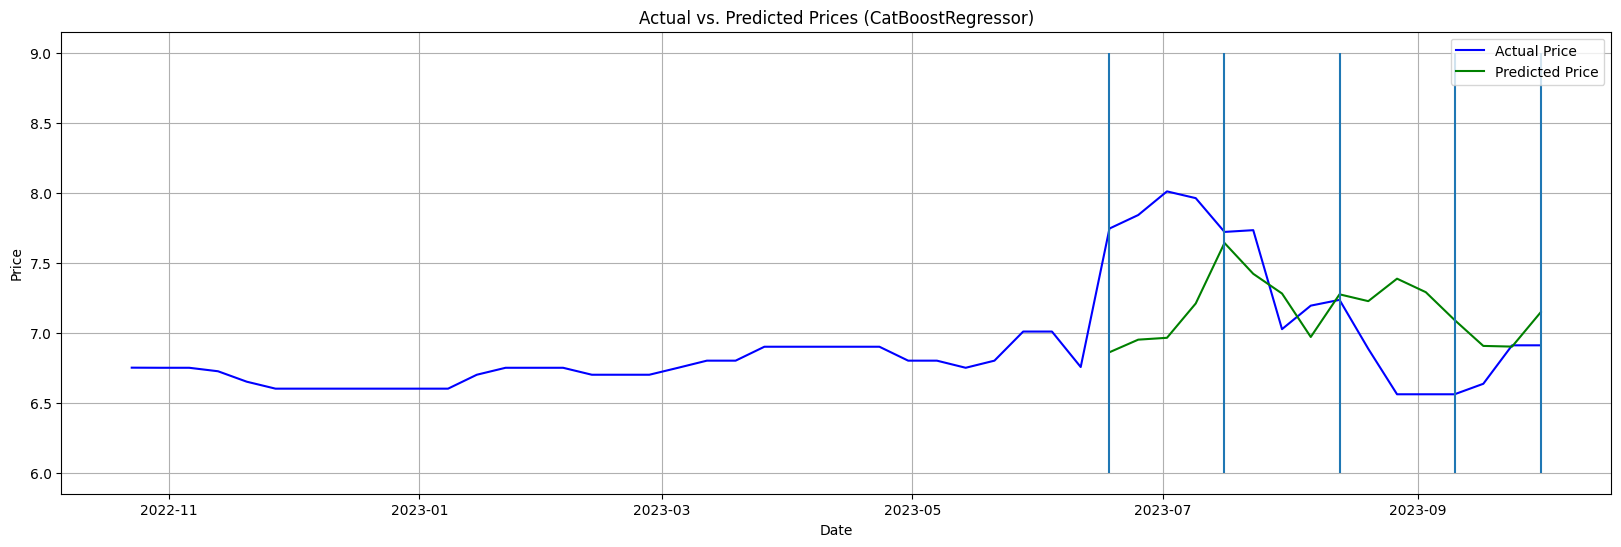

In [356]:
plot_actual_vs_predicted(actual_df_green, CatBoostRegressor_outcome_green_all, 'green',6 ,9, 'CatBoostRegressor' )

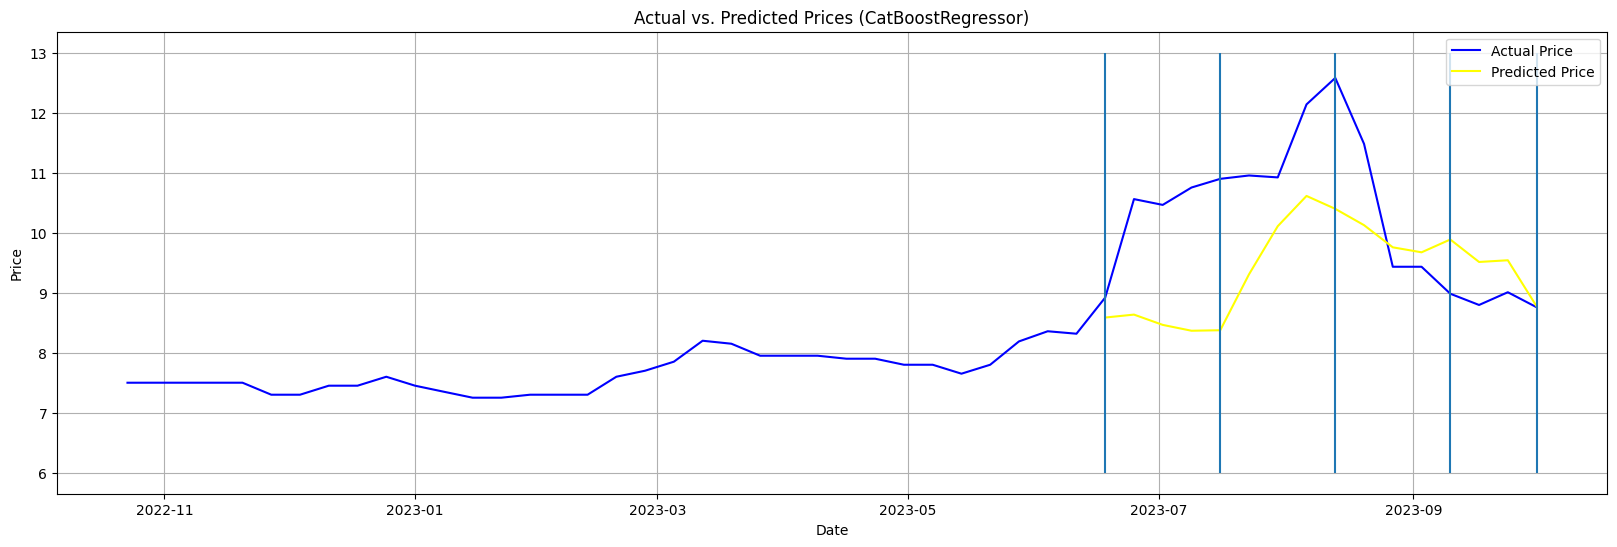

In [357]:
plot_actual_vs_predicted(actual_df_yellow, CatBoostRegressor_outcome_yellow_all, 'yellow',6 ,13, 'CatBoostRegressor' )

##Hyperparamers tunning

try to make Hyperparamers tunning on XGBRegressor

In [125]:
from hyperopt import fmin,tpe,STATUS_OK,Trials,hp

In [126]:
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1),
    'max_depth': hp.quniform('max_depth', 3, 20, 1),
    'eta'      : hp.uniform("eta", 0, 2),
    'gamma'    : hp.uniform("gamma", 0, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bynode': hp.uniform("colsample_bynode", 0.5,1),
    'colsample_bylevel': hp.uniform("colsample_bylevel", 0.5,1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
}

In [127]:


def objective(space):
  for i in range(n_train, len(df_red_12feat) - forecast_horizon + 1):
    # Split the data into the training set and test set for each window
    train_data = df_red_12feat[i - n_train:i]
    test_data = df_red_12feat[i:i + forecast_horizon]

    X_train= train_data.drop('price', axis= 1)
    y_train= train_data['price']

    X_test= test_data.drop('price', axis= 1)
    y_test= test_data['price']


    model_opt = XGBRegressor(max_depth=int(space['max_depth']),
                            subsample= float(space['subsample']),
                            learning_rate= float(space['learning_rate']),
                            eta=float(space['eta']),
                            gamma=float(space['gamma']),
                            colsample_bynode=float(space['colsample_bynode']),
                            colsample_bylevel=float(space['colsample_bylevel']),
                            colsample_bytree=float(space['colsample_bytree']),
                            n_estimators=int(space['n_estimators']),
                            )
    mae_results_red = []
    model_opt.fit(X_train, y_train)
    y_pred_red = model_opt.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_red)

    mae_results_red.append(mae)
    mean_mae= np.mean(mae_results_red)

    return {
            'loss': mean_mae,
            'status': STATUS_OK
            }

In [128]:
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200)
print(best)

100%|██████████| 200/200 [01:19<00:00,  2.52trial/s, best loss: 0.3360522207641603]
{'colsample_bylevel': 0.8173653422576228, 'colsample_bynode': 0.7416173345252512, 'colsample_bytree': 0.8073022728982743, 'eta': 0.45730468083615483, 'gamma': 0.29221512269260047, 'learning_rate': 0.623013382258189, 'max_depth': 10.0, 'min_child_weight': 4.0, 'n_estimators': 85.0, 'subsample': 0.7577539490670459}


In [129]:
mae_results_red = []
row= {}
model_data_red = []


for i in range(n_train, len(df_red_12feat) - forecast_horizon + 1):
  # Split the data into the training set and test set for each window
  train_data = df_red_12feat[i - n_train:i]
  test_data = df_red_12feat[i:i + forecast_horizon]

  X_train= train_data.drop('price', axis= 1)
  y_train= train_data['price']

  X_test= test_data.drop('price', axis= 1)
  y_test= test_data['price']


  model_opt = XGBRegressor(max_depth=int(best['max_depth']),
                          subsample= float(best['subsample']),
                          learning_rate= float(best['learning_rate']),
                          eta=float(best['eta']),
                          gamma=float(best['gamma']),
                          colsample_bynode=float(best['colsample_bynode']),
                          colsample_bylevel=float(best['colsample_bylevel']),
                          colsample_bytree=float(best['colsample_bytree']),
                          n_estimators=int(best['n_estimators']),
                          )
  model_opt.fit(X_train, y_train)
  y_pred_red = model_opt.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred_red)

  mae_results_red.append(mae)
  row= {}
  row['window'] = i - n_train
  row['week_end_dt'] = y_test.index.values
  row["model_name"] = model_name
  row["mae"] = mae
  row["y_test"] =  y_test.values
  row["y_pred_red"] = y_pred_red


  model_data_red.append(row)

In [130]:
model_data_red= pd.DataFrame(model_data_red)

Green_data

In [131]:
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'eta'      : hp.uniform("eta", 0, 1),
    'gamma'    : hp.uniform("gamma", 0, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bynode': hp.uniform("colsample_bynode", 0.5,1),
    'colsample_bylevel': hp.uniform("colsample_bylevel", 0.5,1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
}

In [132]:


def objective(space):
  for i in range(n_train, len(df_green_12feat) - forecast_horizon + 1):
    # Split the data into the training set and test set for each window
    train_data = df_green_12feat[i - n_train:i]
    test_data = df_green_12feat[i:i + forecast_horizon]

    X_train= train_data.drop('price', axis= 1)
    y_train= train_data['price']

    X_test= test_data.drop('price', axis= 1)
    y_test= test_data['price']


    model_opt = XGBRegressor(max_depth=int(space['max_depth']),
                            subsample= float(space['subsample']),
                            learning_rate= float(space['learning_rate']),
                            eta=float(space['eta']),
                            gamma=float(space['gamma']),
                            colsample_bynode=float(space['colsample_bynode']),
                            colsample_bylevel=float(space['colsample_bylevel']),
                            colsample_bytree=float(space['colsample_bytree']),
                            n_estimators=int(space['n_estimators']),
                            )
    mae_results_green = []
    model_opt.fit(X_train, y_train)
    y_pred_green = model_opt.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_red)

    mae_results_green.append(mae)
    mean_mae= np.mean(mae_results_green)

    return {
            'loss': mean_mae,
            'status': STATUS_OK
            }

In [133]:
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200)
print(best)

100%|██████████| 200/200 [01:31<00:00,  2.19trial/s, best loss: 0.3330785744476319]
{'colsample_bylevel': 0.8468516343106819, 'colsample_bynode': 0.5385944267622513, 'colsample_bytree': 0.8280568858143629, 'eta': 0.7989248761841697, 'gamma': 0.6321317112288314, 'learning_rate': 0.019044713844803357, 'max_depth': 9.0, 'min_child_weight': 8.0, 'n_estimators': 808.0, 'subsample': 0.7364726229452294}


In [134]:
mae_results_green = []
row= {}
model_data_green = []


for i in range(n_train, len(df_green_12feat) - forecast_horizon + 1):
  # Split the data into the training set and test set for each window
  train_data = df_green_12feat[i - n_train:i]
  test_data = df_green_12feat[i:i + forecast_horizon]

  X_train= train_data.drop('price', axis= 1)
  y_train= train_data['price']

  X_test= test_data.drop('price', axis= 1)
  y_test= test_data['price']


  model_opt = XGBRegressor(max_depth=int(best['max_depth']),
                          subsample= float(best['subsample']),
                          learning_rate= float(best['learning_rate']),
                          eta=float(best['eta']),
                          gamma=float(best['gamma']),
                          colsample_bynode=float(best['colsample_bynode']),
                          colsample_bylevel=float(best['colsample_bylevel']),
                          colsample_bytree=float(best['colsample_bytree']),
                          n_estimators=int(best['n_estimators']),
                          )
  model_opt.fit(X_train, y_train)
  y_pred_green = model_opt.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred_green)

  mae_results_green.append(mae)
  row= {}
  row['window'] = i - n_train
  row['week_end_dt'] = y_test.index.values
  row["model_name"] = model_name
  row["mae"] = mae
  row["y_test"] =  y_test.values
  row["y_pred_green"] = y_pred_green


  model_data_green.append(row)

In [135]:
model_data_green= pd.DataFrame(model_data_green)

yellow_data

In [136]:
space = {
    'n_estimators': hp.quniform('n_estimators', 1, 300, 1),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'eta'      : hp.uniform("eta", 0, .01),
    'gamma'    : hp.uniform("gamma", 0, .01),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(.001)),
    'subsample': hp.uniform('subsample', 0.3, 1.0),
    'colsample_bynode': hp.uniform("colsample_bynode", 0.1,1),
    'colsample_bylevel': hp.uniform("colsample_bylevel", 0.1,1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 5, 1),
}

In [137]:


def objective(space):
  for i in range(n_train, len(df_yellow_12feat) - forecast_horizon + 1):
    # Split the data into the training set and test set for each window
    train_data = df_yellow_12feat[i - n_train:i]
    test_data = df_yellow_12feat[i:i + forecast_horizon]

    X_train= train_data.drop('price', axis= 1)
    y_train= train_data['price']

    X_test= test_data.drop('price', axis= 1)
    y_test= test_data['price']


    model_opt = XGBRegressor(max_depth=int(space['max_depth']),
                            subsample= float(space['subsample']),
                            learning_rate= float(space['learning_rate']),
                            eta=float(space['eta']),
                            gamma=float(space['gamma']),
                            colsample_bynode=float(space['colsample_bynode']),
                            colsample_bylevel=float(space['colsample_bylevel']),
                            colsample_bytree=float(space['colsample_bytree']),
                            n_estimators=int(space['n_estimators']),
                            )
    mae_results_yellow = []
    model_opt.fit(X_train, y_train)
    y_pred_yellow = model_opt.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_yellow)

    mae_results_yellow.append(mae)
    mean_mae= np.mean(mae_results_yellow)

    return {
            'loss': mean_mae,
            'status': STATUS_OK
            }

In [138]:
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200)
print(best)

100%|██████████| 200/200 [00:53<00:00,  3.71trial/s, best loss: 1.269320321350098]
{'colsample_bylevel': 0.7970993874411977, 'colsample_bynode': 0.3034067454942259, 'colsample_bytree': 0.3577563011245428, 'eta': 0.008869723475538153, 'gamma': 0.005299893212695337, 'learning_rate': 0.0001172316497515941, 'max_depth': 3.0, 'min_child_weight': 1.0, 'n_estimators': 1.0, 'subsample': 0.6187587486829111}


In [139]:
mae_results_yellow = []
row= {}
model_data_yellow = []


for i in range(n_train, len(df_yellow_12feat) - forecast_horizon + 1):
  # Split the data into the training set and test set for each window
  train_data = df_yellow_12feat[i - n_train:i]
  test_data = df_yellow_12feat[i:i + forecast_horizon]

  X_train= train_data.drop('price', axis= 1)
  y_train= train_data['price']

  X_test= test_data.drop('price', axis= 1)
  y_test= test_data['price']


  model_opt = XGBRegressor(max_depth=int(best['max_depth']),
                          subsample= float(best['subsample']),
                          learning_rate= float(best['learning_rate']),
                          eta=float(best['eta']),
                          gamma=float(best['gamma']),
                          colsample_bynode=float(best['colsample_bynode']),
                          colsample_bylevel=float(best['colsample_bylevel']),
                          colsample_bytree=float(best['colsample_bytree']),
                          n_estimators=int(best['n_estimators']),
                          )
  model_opt.fit(X_train, y_train)
  y_pred_yellow = model_opt.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred_yellow)

  mae_results_yellow.append(mae)
  row= {}
  row['window'] = i - n_train
  row['week_end_dt'] = y_test.index.values
  row["model_name"] = model_name
  row["mae"] = mae
  row["y_test"] =  y_test.values
  row["y_pred_yellow"] = y_pred_yellow


  model_data_yellow.append(row)

In [140]:
model_data_yellow= pd.DataFrame(model_data_yellow)

In [141]:
XGBRegressor_model_red = model_data_red.explode(['week_end_dt','y_test', 'y_pred_red'])
XGBRegressor_model_red['week_end_dt']= pd.to_datetime(XGBRegressor_model_red['week_end_dt'])

XGBRegressor_model_red
XGBRegressor_model_red['mae'].mean()

0.5139901618439894

In [142]:

XGBRegressor_model_green = XGBRegressor_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
XGBRegressor_model_green['week_end_dt']= pd.to_datetime(XGBRegressor_model_green['week_end_dt'])

XGBRegressor_model_green
XGBRegressor_model_green['mae'].mean()

0.47459321533367455

In [143]:

XGBRegressor_model_yellow = XGBRegressor_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
XGBRegressor_model_yellow['week_end_dt']= pd.to_datetime(XGBRegressor_model_yellow['week_end_dt'])

XGBRegressor_model_yellow
XGBRegressor_model_yellow['mae'].mean()

1.3498021869458714

In [144]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBRegressor_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRegressor_model_red[XGBRegressor_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_XGBRegressor_red=pd.concat([df_XGBRegressor_red, df], axis=0)

df_XGBRegressor_red.reset_index(inplace=True)


In [145]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBRegressor_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRegressor_model_green[XGBRegressor_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_XGBRegressor_green=pd.concat([df_XGBRegressor_green, df], axis=0)

df_XGBRegressor_green.reset_index(inplace=True)

In [146]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBRegressor_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRegressor_model_yellow[XGBRegressor_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_XGBRegressor_yellow=pd.concat([df_XGBRegressor_yellow, df], axis=0)

df_XGBRegressor_yellow.reset_index(inplace=True)

In [147]:
outcome_red=df_XGBRegressor_red['y_pred_red']
outcome_green=df_XGBRegressor_green['y_pred_green']
outcome_yellow=df_XGBRegressor_yellow['y_pred_yellow']

In [148]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [149]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

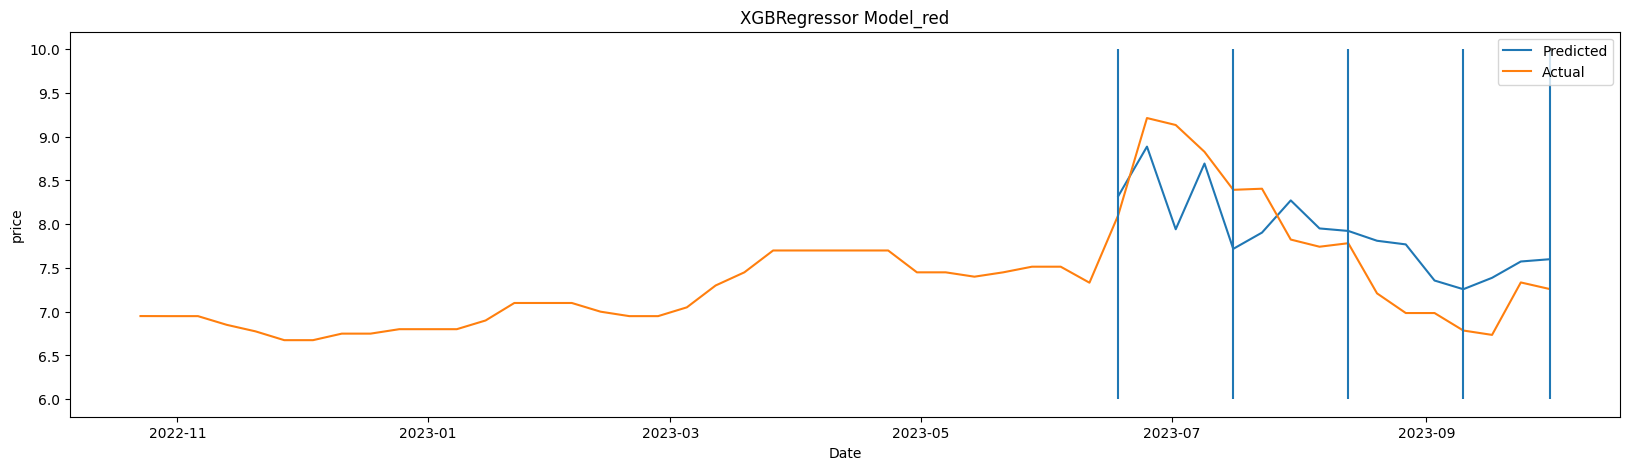

In [150]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBRegressor Model_red')
plt.legend()

# Show the plot
plt.show()

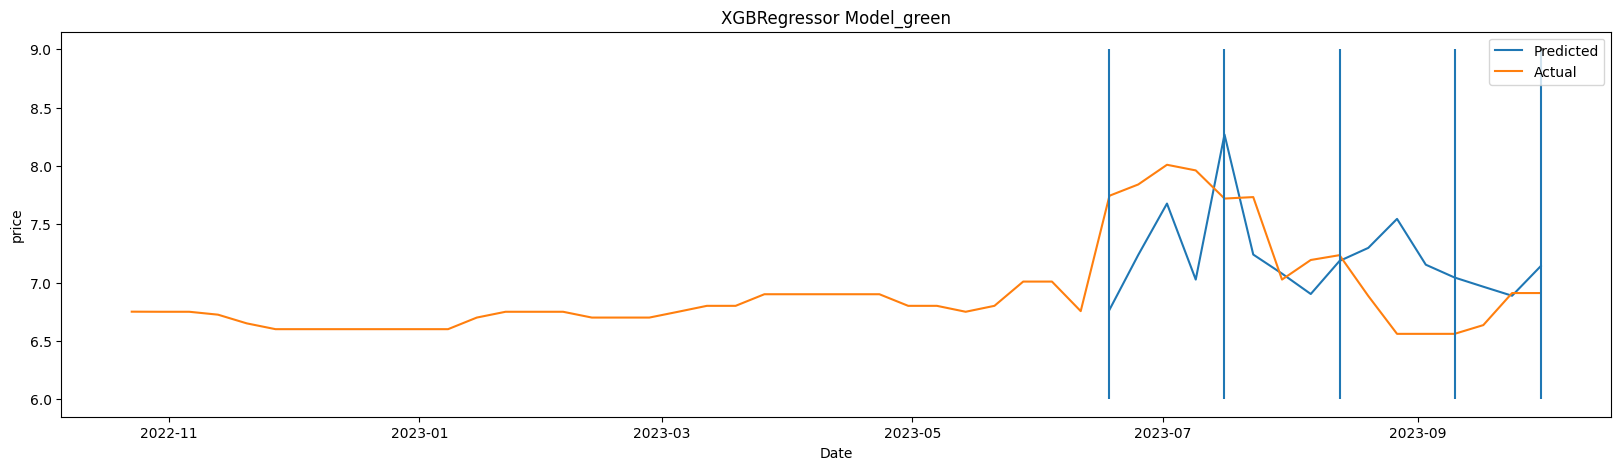

In [151]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBRegressor Model_green')
plt.legend()

# Show the plot
plt.show()

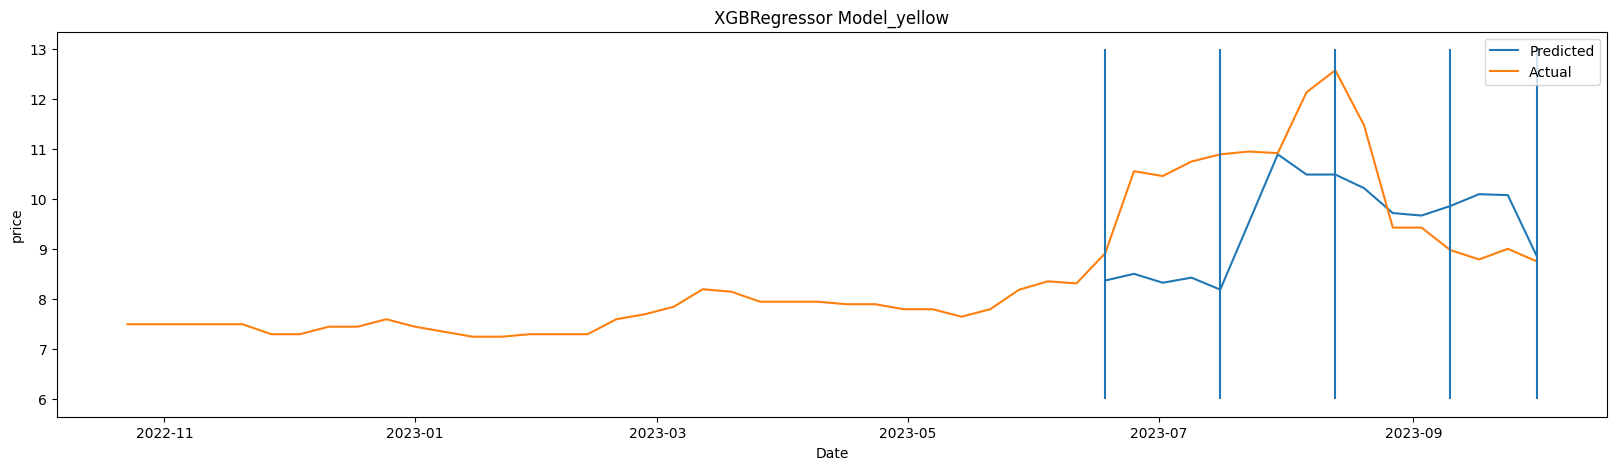

In [152]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBRegressor Model_yellow')
plt.legend()

# Show the plot
plt.show()